In [1]:
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
breast_cancer = datasets.load_breast_cancer()

## Describe the selected dataset

In [3]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
def cancer(value):
    cancer1 = breast_cancer.target_names[value]
    return cancer1

cancer_function = lambda x: breast_cancer[x]

In [5]:
cancer_data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
cancer_data["tag_cancer"] = breast_cancer.target

#Editing column names
cancer_data.columns = cancer_data.columns.str.replace(" ", "")
cancer_data.tag_cancer = cancer_data.tag_cancer.apply(cancer)
cancer_data.head()

meanradius  meantexture  meanperimeter  meanarea  meansmoothness  \
0       17.99        10.38         122.80    1001.0         0.11840   
1       20.57        17.77         132.90    1326.0         0.08474   
2       19.69        21.25         130.00    1203.0         0.10960   
3       11.42        20.38          77.58     386.1         0.14250   
4       20.29        14.34         135.10    1297.0         0.10030   

   meancompactness  meanconcavity  meanconcavepoints  meansymmetry  \
0          0.27760         0.3001            0.14710        0.2419   
1          0.07864         0.0869            0.07017        0.1812   
2          0.15990         0.1974            0.12790        0.2069   
3          0.28390         0.2414            0.10520        0.2597   
4          0.13280         0.1980            0.10430        0.1809   

   meanfractaldimension  ...  worsttexture  worstperimeter  worstarea  \
0               0.07871  ...         17.33          184.60     2019.0   
1               0.05667  ...         23.41          158.80     1956.0   
2               0.05999  ...         25.53          152.50     1709.0   
3               0.09744  ...         26.50           98.87      567.7   
4               0.05883  ...         16.67          152.20     1575.0   

   worstsmoothness  worstcompactness  worstconcavity  worstconcavepoints  \
0           0.1622            0.6656          0.7119              0.2654   
1           0.1238            0.1866          0.2416              0.1860   
2           0.1444            0.4245          0.4504              0.2430   
3           0.2098            0.8663          0.6869              0.2575   
4           0.1374            0.2050          0.4000              0.1625   

   worstsymmetry  worstfractaldimension  tag_cancer  
0         0.4601                0.11890   malignant  
1         0.2750                0.08902   malignant  
2         0.3613                0.08758   malignant  
3         0.6638                0.17300   malignant  
4         0.2364                0.07678   malignant  

[5 rows x 31 columns]

In [6]:
#Getting the dimesions of thew data frame
breast_cancer_shape = cancer_data.shape
print("Number of Observations: ", breast_cancer_shape[0])
print("Number of Columns: ", breast_cancer_shape[1])

Number of Observations:  569
Number of Columns:  31


In [7]:
# Data Characteristics
cancer_data.describe().T

count        mean         std         min         25%  \
meanradius             569.0   14.127292    3.524049    6.981000   11.700000   
meantexture            569.0   19.289649    4.301036    9.710000   16.170000   
meanperimeter          569.0   91.969033   24.298981   43.790000   75.170000   
meanarea               569.0  654.889104  351.914129  143.500000  420.300000   
meansmoothness         569.0    0.096360    0.014064    0.052630    0.086370   
meancompactness        569.0    0.104341    0.052813    0.019380    0.064920   
meanconcavity          569.0    0.088799    0.079720    0.000000    0.029560   
meanconcavepoints      569.0    0.048919    0.038803    0.000000    0.020310   
meansymmetry           569.0    0.181162    0.027414    0.106000    0.161900   
meanfractaldimension   569.0    0.062798    0.007060    0.049960    0.057700   
radiuserror            569.0    0.405172    0.277313    0.111500    0.232400   
textureerror           569.0    1.216853    0.551648    0.360200    0.833900   
perimetererror         569.0    2.866059    2.021855    0.757000    1.606000   
areaerror              569.0   40.337079   45.491006    6.802000   17.850000   
smoothnesserror        569.0    0.007041    0.003003    0.001713    0.005169   
compactnesserror       569.0    0.025478    0.017908    0.002252    0.013080   
concavityerror         569.0    0.031894    0.030186    0.000000    0.015090   
concavepointserror     569.0    0.011796    0.006170    0.000000    0.007638   
symmetryerror          569.0    0.020542    0.008266    0.007882    0.015160   
fractaldimensionerror  569.0    0.003795    0.002646    0.000895    0.002248   
worstradius            569.0   16.269190    4.833242    7.930000   13.010000   
worsttexture           569.0   25.677223    6.146258   12.020000   21.080000   
worstperimeter         569.0  107.261213   33.602542   50.410000   84.110000   
worstarea              569.0  880.583128  569.356993  185.200000  515.300000   
worstsmoothness        569.0    0.132369    0.022832    0.071170    0.116600   
worstcompactness       569.0    0.254265    0.157336    0.027290    0.147200   
worstconcavity         569.0    0.272188    0.208624    0.000000    0.114500   
worstconcavepoints     569.0    0.114606    0.065732    0.000000    0.064930   
worstsymmetry          569.0    0.290076    0.061867    0.156500    0.250400   
worstfractaldimension  569.0    0.083946    0.018061    0.055040    0.071460   

                              50%          75%         max  
meanradius              13.370000    15.780000    28.11000  
meantexture             18.840000    21.800000    39.28000  
meanperimeter           86.240000   104.100000   188.50000  
meanarea               551.100000   782.700000  2501.00000  
meansmoothness           0.095870     0.105300     0.16340  
meancompactness          0.092630     0.130400     0.34540  
meanconcavity            0.061540     0.130700     0.42680  
meanconcavepoints        0.033500     0.074000     0.20120  
meansymmetry             0.179200     0.195700     0.30400  
meanfractaldimension     0.061540     0.066120     0.09744  
radiuserror              0.324200     0.478900     2.87300  
textureerror             1.108000     1.474000     4.88500  
perimetererror           2.287000     3.357000    21.98000  
areaerror               24.530000    45.190000   542.20000  
smoothnesserror          0.006380     0.008146     0.03113  
compactnesserror         0.020450     0.032450     0.13540  
concavityerror           0.025890     0.042050     0.39600  
concavepointserror       0.010930     0.014710     0.05279  
symmetryerror            0.018730     0.023480     0.07895  
fractaldimensionerror    0.003187     0.004558     0.02984  
worstradius             14.970000    18.790000    36.04000  
worsttexture            25.410000    29.720000    49.54000  
worstperimeter          97.660000   125.400000   251.20000  
worstarea              686.500000  1084.000000  4254.00000  
worstsmoothness  

In [8]:
# Data (Storage) Type
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
meanradius               569 non-null float64
meantexture              569 non-null float64
meanperimeter            569 non-null float64
meanarea                 569 non-null float64
meansmoothness           569 non-null float64
meancompactness          569 non-null float64
meanconcavity            569 non-null float64
meanconcavepoints        569 non-null float64
meansymmetry             569 non-null float64
meanfractaldimension     569 non-null float64
radiuserror              569 non-null float64
textureerror             569 non-null float64
perimetererror           569 non-null float64
areaerror                569 non-null float64
smoothnesserror          569 non-null float64
compactnesserror         569 non-null float64
concavityerror           569 non-null float64
concavepointserror       569 non-null float64
symmetryerror            569 non-null float64
fractaldimensionerror

In [9]:
# Null Values
cancer_data.isnull().sum() 

meanradius               0
meantexture              0
meanperimeter            0
meanarea                 0
meansmoothness           0
meancompactness          0
meanconcavity            0
meanconcavepoints        0
meansymmetry             0
meanfractaldimension     0
radiuserror              0
textureerror             0
perimetererror           0
areaerror                0
smoothnesserror          0
compactnesserror         0
concavityerror           0
concavepointserror       0
symmetryerror            0
fractaldimensionerror    0
worstradius              0
worsttexture             0
worstperimeter           0
worstarea                0
worstsmoothness          0
worstcompactness         0
worstconcavity           0
worstconcavepoints       0
worstsymmetry            0
worstfractaldimension    0
tag_cancer               0
dtype: int64

In [10]:
#Variable Balance from the targets
cancer_data.tag_cancer.value_counts()

benign       357
malignant    212
Name: tag_cancer, dtype: int64

In [11]:
#Check is there is any duplicated data
cancer_data[cancer_data.duplicated()==True]

Empty DataFrame
Columns: [meanradius, meantexture, meanperimeter, meanarea, meansmoothness, meancompactness, meanconcavity, meanconcavepoints, meansymmetry, meanfractaldimension, radiuserror, textureerror, perimetererror, areaerror, smoothnesserror, compactnesserror, concavityerror, concavepointserror, symmetryerror, fractaldimensionerror, worstradius, worsttexture, worstperimeter, worstarea, worstsmoothness, worstcompactness, worstconcavity, worstconcavepoints, worstsymmetry, worstfractaldimension, tag_cancer]
Index: []

[0 rows x 31 columns]

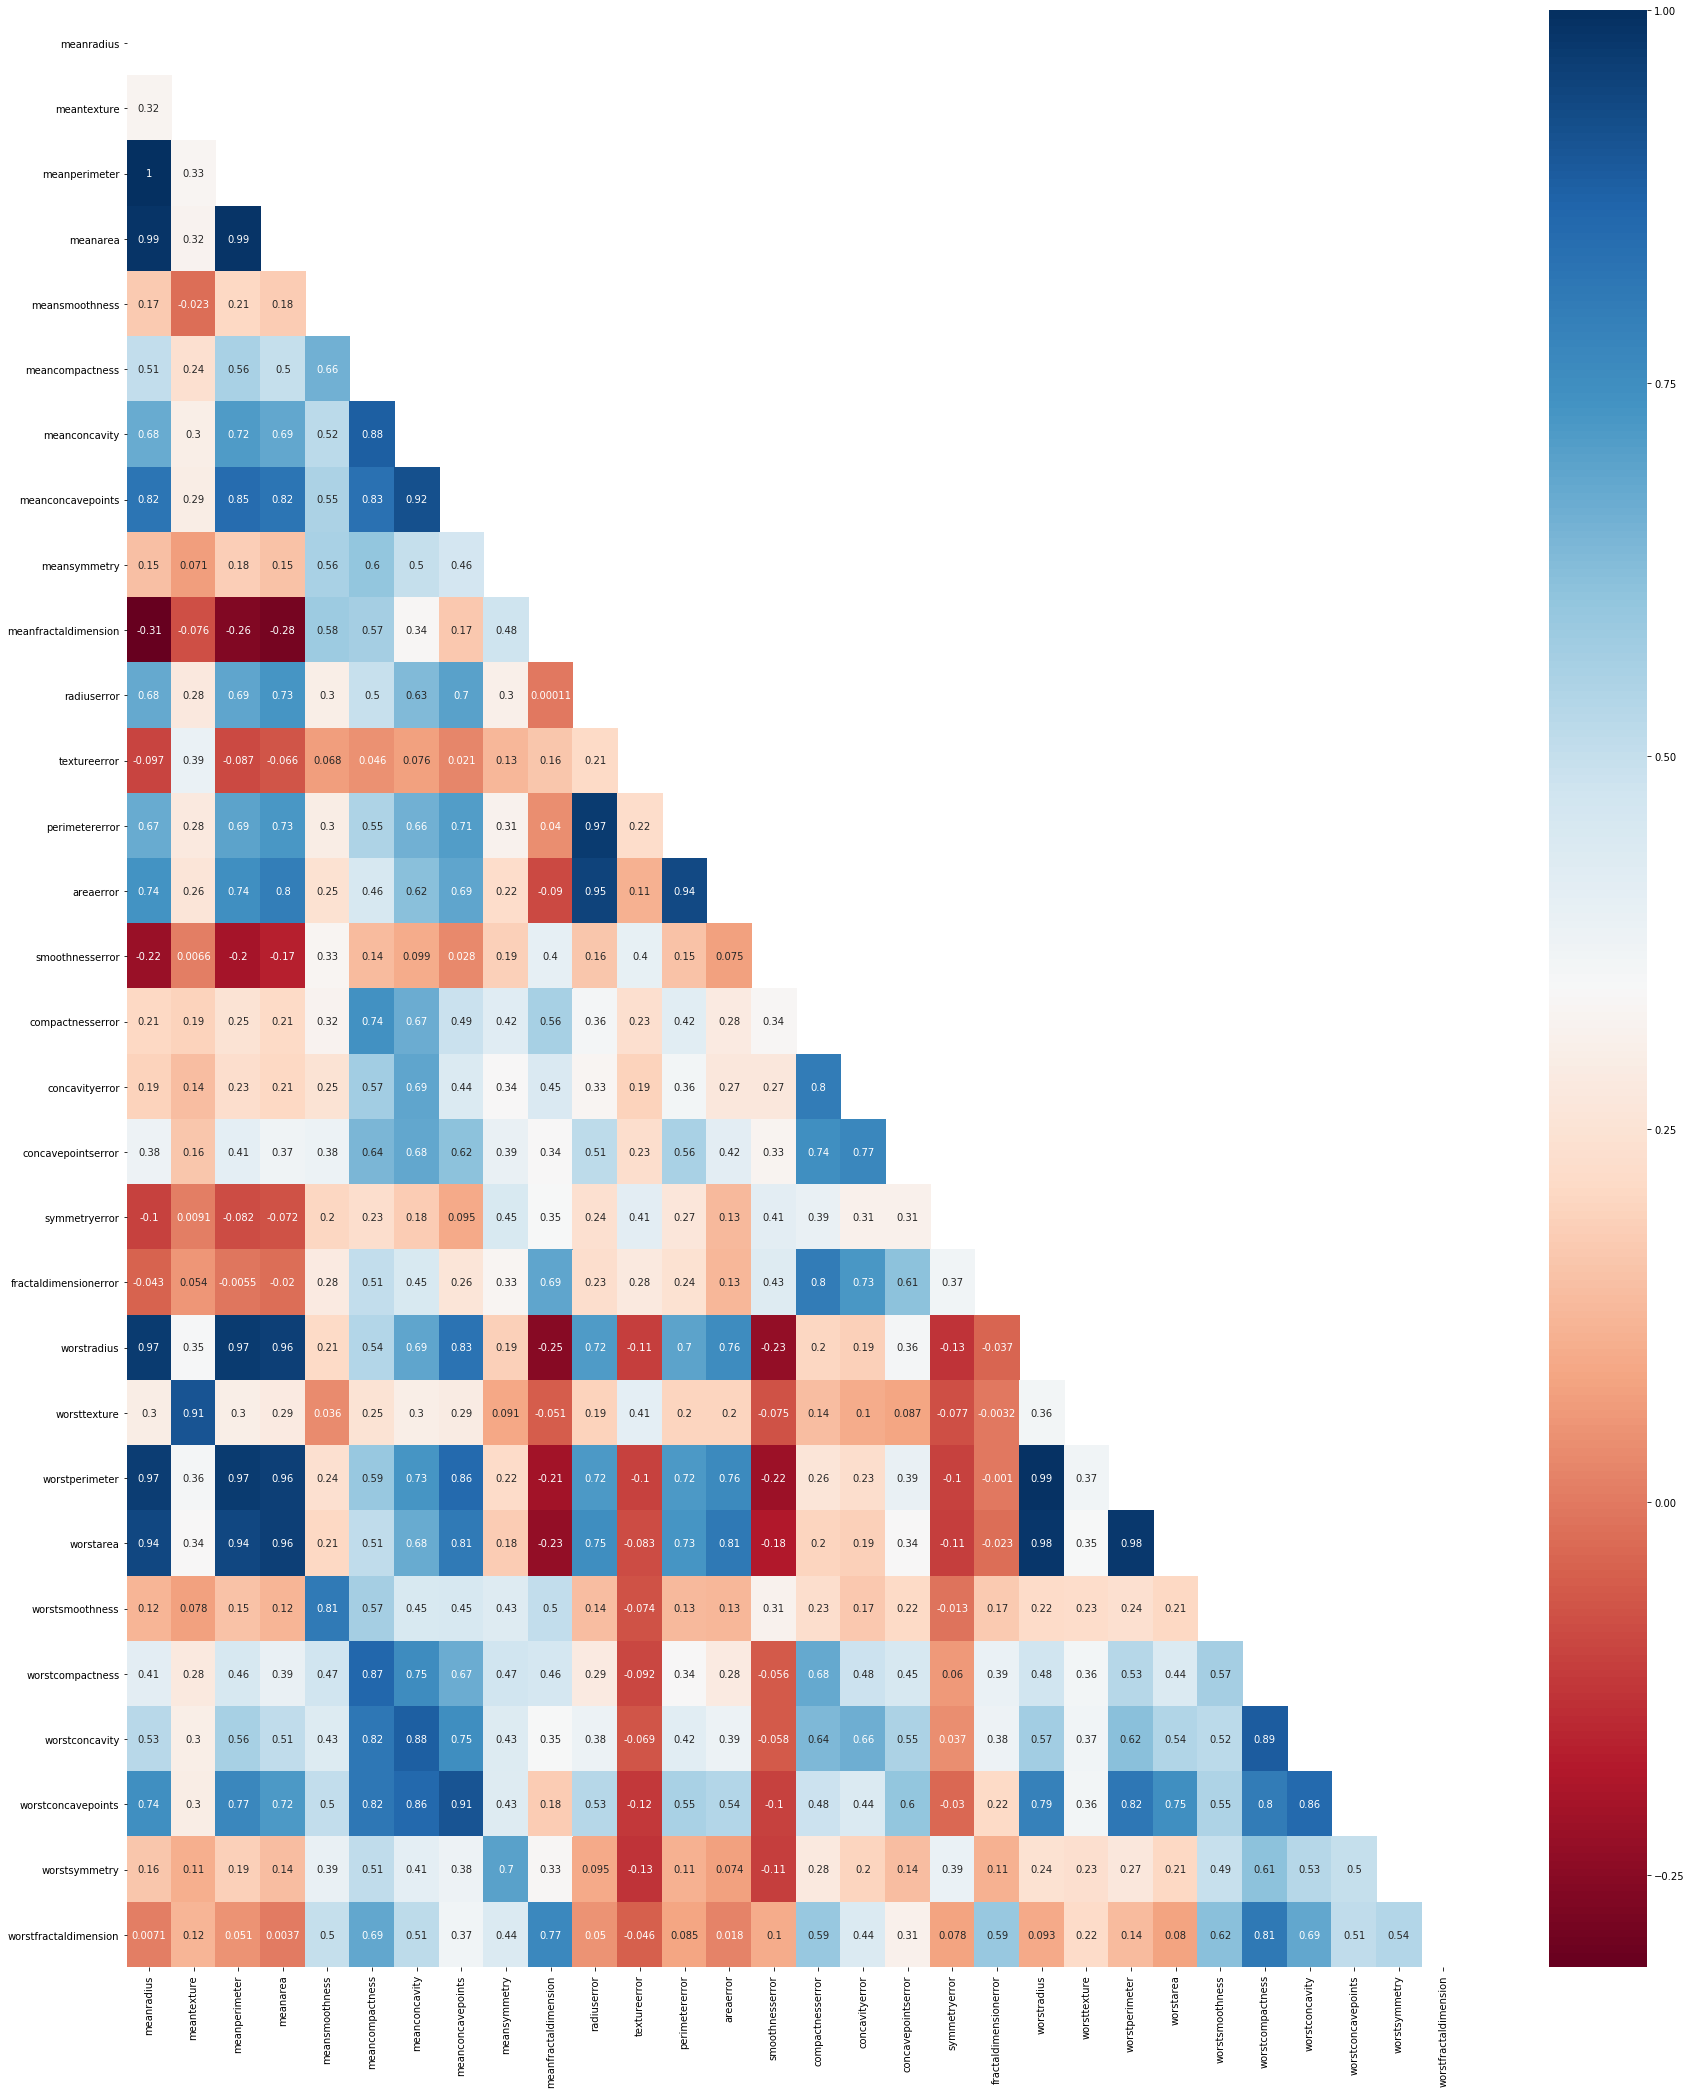

In [12]:
"""
The next matrix shows the correlation of all the variables from the dataset.
It is very hard to read and even harder to obtain any insight from it; therefore, it will be splitted into smaller matrixes
which will result easier to read and understand.
-----------------------------------

There is only one thing that we can learn from this big matrix: that there are too many variables to work with all of them
at the same time.
"""

# corelation matrix of all the data
correlation_matrix = cancer_data.corr()

# Heatmap
# From the heatmap it can be observed those variables with a very strong direct and indirect correlation.
mask = np.zeros_like (correlation_matrix, dtype = np.bool) 
mask[np.triu_indices_from (mask)] = True 
plt.rcParams['figure.figsize'] =  [30,36]
sns.heatmap(correlation_matrix, annot = True, cmap = 'RdBu', mask = mask)
plt.show()

### In order to understand better the data, it was subdivided into 3 new frames. In the first one, all mean variables were grouped, in the second one, the error variables, and in the 3rd one, the worst variables.

## 1.-  Dataframe with the mean variables.

In [13]:
# From cancer_data, all the mean variables were saved into a new data frame.
cancer_data_means = pd.DataFrame()
cancer_data_means = cancer_data[['meanradius', 'meantexture', 'meanperimeter', 'meanarea', 'meansmoothness', 'meancompactness', 'meanconcavity', 'meanconcavepoints', 'meansymmetry', 'meanfractaldimension', 'tag_cancer']]
cancer_data_means.head()

meanradius  meantexture  meanperimeter  meanarea  meansmoothness  \
0       17.99        10.38         122.80    1001.0         0.11840   
1       20.57        17.77         132.90    1326.0         0.08474   
2       19.69        21.25         130.00    1203.0         0.10960   
3       11.42        20.38          77.58     386.1         0.14250   
4       20.29        14.34         135.10    1297.0         0.10030   

   meancompactness  meanconcavity  meanconcavepoints  meansymmetry  \
0          0.27760         0.3001            0.14710        0.2419   
1          0.07864         0.0869            0.07017        0.1812   
2          0.15990         0.1974            0.12790        0.2069   
3          0.28390         0.2414            0.10520        0.2597   
4          0.13280         0.1980            0.10430        0.1809   

   meanfractaldimension tag_cancer  
0               0.07871  malignant  
1               0.05667  malignant  
2               0.05999  malignant  
3               0.09744  malignant  
4               0.05883  malignant

## No-Graphical Techniques of  Univariate Analysis

In [14]:
# Data Characteristics (this includes quantiles which is a kind of dispersion )
cancer_data_means.describe().T

count        mean         std        min        25%  \
meanradius            569.0   14.127292    3.524049    6.98100   11.70000   
meantexture           569.0   19.289649    4.301036    9.71000   16.17000   
meanperimeter         569.0   91.969033   24.298981   43.79000   75.17000   
meanarea              569.0  654.889104  351.914129  143.50000  420.30000   
meansmoothness        569.0    0.096360    0.014064    0.05263    0.08637   
meancompactness       569.0    0.104341    0.052813    0.01938    0.06492   
meanconcavity         569.0    0.088799    0.079720    0.00000    0.02956   
meanconcavepoints     569.0    0.048919    0.038803    0.00000    0.02031   
meansymmetry          569.0    0.181162    0.027414    0.10600    0.16190   
meanfractaldimension  569.0    0.062798    0.007060    0.04996    0.05770   

                            50%        75%         max  
meanradius             13.37000   15.78000    28.11000  
meantexture            18.84000   21.80000    39.28000  
meanperimeter          86.24000  104.10000   188.50000  
meanarea              551.10000  782.70000  2501.00000  
meansmoothness          0.09587    0.10530     0.16340  
meancompactness         0.09263    0.13040     0.34540  
meanconcavity           0.06154    0.13070     0.42680  
meanconcavepoints       0.03350    0.07400     0.20120  
meansymmetry            0.17920    0.19570     0.30400  
meanfractaldimension    0.06154    0.06612     0.09744

In [15]:
#Central Tendency: Mode
cancer_data_means.mode()

meanradius  meantexture  meanperimeter  meanarea  meansmoothness  \
0       12.34        14.93          82.61     512.2          0.1007   
1         NaN        15.70          87.76       NaN             NaN   
2         NaN        16.84         134.70       NaN             NaN   
3         NaN        16.85            NaN       NaN             NaN   
4         NaN        17.46            NaN       NaN             NaN   
5         NaN        18.22            NaN       NaN             NaN   
6         NaN        18.90            NaN       NaN             NaN   
7         NaN        19.83            NaN       NaN             NaN   
8         NaN        20.52            NaN       NaN             NaN   

   meancompactness  meanconcavity  meanconcavepoints  meansymmetry  \
0           0.1147            0.0                0.0        0.1601   
1           0.1206            NaN                NaN        0.1714   
2              NaN            NaN                NaN        0.1717   
3              NaN            NaN                NaN        0.1769   
4              NaN            NaN                NaN        0.1893   
5              NaN            NaN                NaN           NaN   
6              NaN            NaN                NaN           NaN   
7              NaN            NaN                NaN           NaN   
8              NaN            NaN                NaN           NaN   

   meanfractaldimension tag_cancer  
0               0.05667     benign  
1               0.05907        NaN  
2               0.05913        NaN  
3               0.06113        NaN  
4               0.06782        NaN  
5                   NaN        NaN  
6                   NaN        NaN  
7                   NaN        NaN  
8                   NaN        NaN

In [16]:
#Central Tendency: median
cancer_data_means.median()

meanradius               13.37000
meantexture              18.84000
meanperimeter            86.24000
meanarea                551.10000
meansmoothness            0.09587
meancompactness           0.09263
meanconcavity             0.06154
meanconcavepoints         0.03350
meansymmetry              0.17920
meanfractaldimension      0.06154
dtype: float64

In [17]:
#Skew
"""
Remember that skewness is:
ASF > 0, Positive Asymmetry.
ASF < 0, Negative Assymetry.
ASF = 0, Assymetric.

In these case we can see how in mean dataframe most of our data is not symmetrical which means that the the right side of 
the distribution is longer or fatter, so the mean and median will be greater than the mode.
"""
skew_mean_data = cancer_data_means.skew()
skew_mean_data

meanradius              0.942380
meantexture             0.650450
meanperimeter           0.990650
meanarea                1.645732
meansmoothness          0.456324
meancompactness         1.190123
meanconcavity           1.401180
meanconcavepoints       1.171180
meansymmetry            0.725609
meanfractaldimension    1.304489
dtype: float64

In [18]:
#Kurtosis
"""
Remember that kurtosis is:
It is actually the measure of outliers present in the distribution
Ap > 3, Leptokurtic means that data are heavy-tailed or profusion of outliers.
Ap < 3, Platikurtic means the distribution produces fewer and less extreme outliers than does the normal distribution.
Ap = 3, Mesokurtic  means means that if the data follows a normal distribution.

Most of our data is less than 3 meaning that we have fewer and less extreme outliers which is good for the analysis, only 
one by very little has a heavy-tailed outlier and we have one that we cansay that follows a normal distribution.
"""
kurtosis_mean_data = cancer_data_means.kurtosis()
kurtosis_mean_data

meanradius              0.845522
meantexture             0.758319
meanperimeter           0.972214
meanarea                3.652303
meansmoothness          0.855975
meancompactness         1.650130
meanconcavity           1.998638
meanconcavepoints       1.066556
meansymmetry            1.287933
meanfractaldimension    3.005892
dtype: float64

## Graphical Techniques of  Univariate Analysis

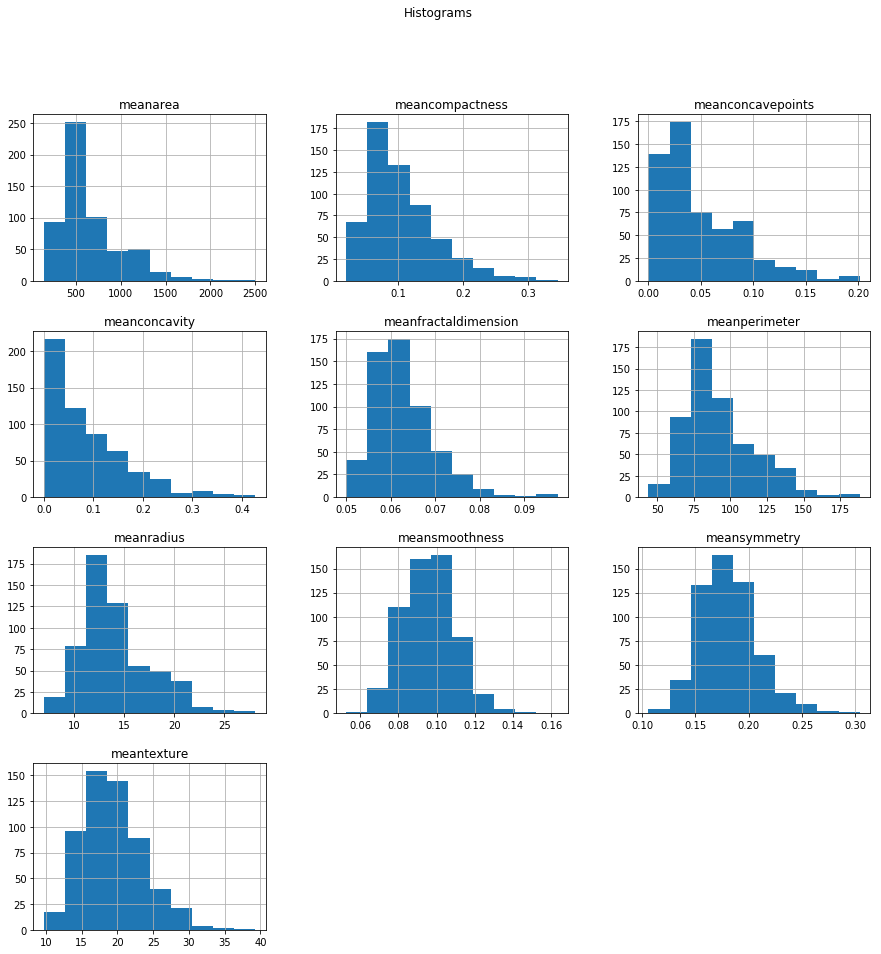

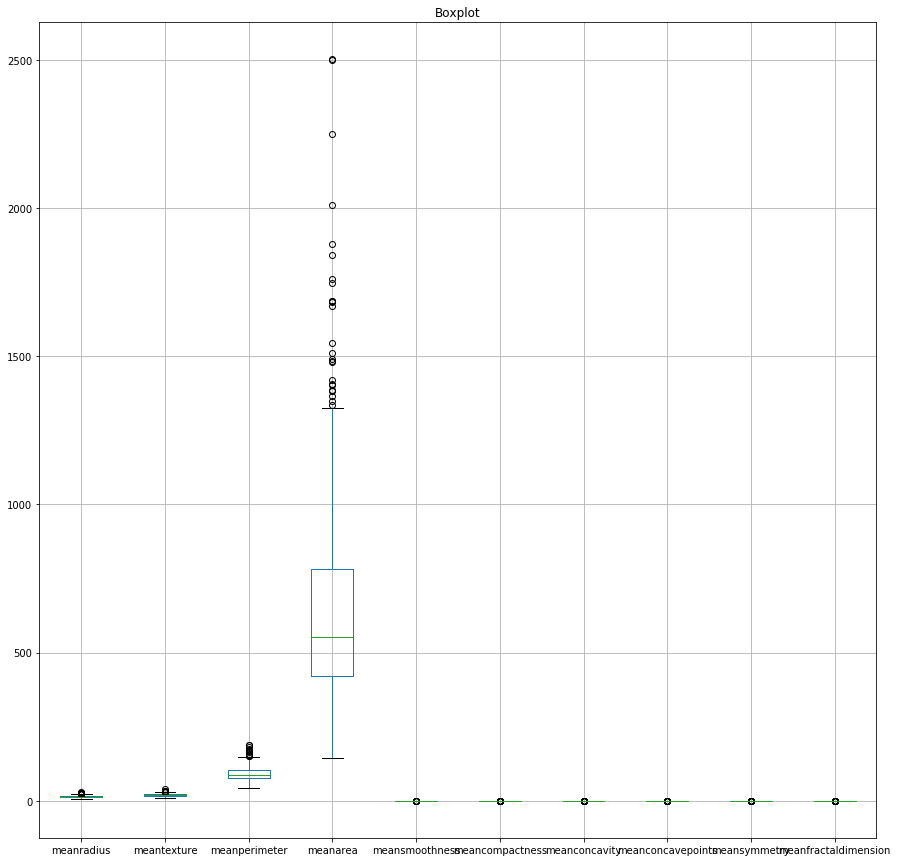

In [19]:
cancer_data_means.hist(figsize = (15, 15))
plt.suptitle("Histograms")
plt.show()
"""
Here we can see that all of our graphs have a tendency to the left side, wichi is something that we could know from the data
of the kurtosis and the skewness
"""

cancer_data_means.boxplot(figsize = (15, 15))
plt.title("Boxplot")
plt.show()

## No-Graphical Techniques of Multivariate Analysis

In [20]:
# correlation 
"""
Remember taht correlation is:
is a statistical measure that indicates how strongly two variables are related.
value > 0 and value =< 1: means that as one variable gets larger the other gets larger: possitive correlation
values < 0 and values >= -1: means that as one gets larger, the other gets smaller: negative correlation
value = 0: means there is no relationship between the variables: zero correlation

Of course we have the biggerst correlation between area and perimeter since we already know they are related so is perimeter
and radius, but the two with a good correlation coefficient are meanconcavity and meanconcavepoints therefore we can use 
them for better tests.
"""
correlation_matrix_means = cancer_data_means.corr()
correlation_matrix_means

meanradius  meantexture  meanperimeter  meanarea  \
meanradius              1.000000     0.323782       0.997855  0.987357   
meantexture             0.323782     1.000000       0.329533  0.321086   
meanperimeter           0.997855     0.329533       1.000000  0.986507   
meanarea                0.987357     0.321086       0.986507  1.000000   
meansmoothness          0.170581    -0.023389       0.207278  0.177028   
meancompactness         0.506124     0.236702       0.556936  0.498502   
meanconcavity           0.676764     0.302418       0.716136  0.685983   
meanconcavepoints       0.822529     0.293464       0.850977  0.823269   
meansymmetry            0.147741     0.071401       0.183027  0.151293   
meanfractaldimension   -0.311631    -0.076437      -0.261477 -0.283110   

                      meansmoothness  meancompactness  meanconcavity  \
meanradius                  0.170581         0.506124       0.676764   
meantexture                -0.023389         0.236702       0.302418   
meanperimeter               0.207278         0.556936       0.716136   
meanarea                    0.177028         0.498502       0.685983   
meansmoothness              1.000000         0.659123       0.521984   
meancompactness             0.659123         1.000000       0.883121   
meanconcavity               0.521984         0.883121       1.000000   
meanconcavepoints           0.553695         0.831135       0.921391   
meansymmetry                0.557775         0.602641       0.500667   
meanfractaldimension        0.584792         0.565369       0.336783   

                      meanconcavepoints  meansymmetry  meanfractaldimension  
meanradius                     0.822529      0.147741             -0.311631  
meantexture                    0.293464      0.071401             -0.076437  
meanperimeter                  0.850977      0.183027             -0.261477  
meanarea                       0.823269      0.151293             -0.283110  
meansmoothness                 0.553695      0.557775              0.584792  
meancompactness                0.831135      0.602641              0.565369  
meanconcavity                  0.921391      0.500667              0.336783  
meanconcavepoints              1.000000      0.462497              0.166917  
meansymmetry                   0.462497      1.000000              0.479921  
meanfractaldimension           0.166917      0.479921              1.000000

In [21]:
# covariance
"""
Remember taht covariance is:
is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a 
single variable varies, co variance tells you how two variables vary together.
value > 0: y increases and x decreases: large possitive covariance
values < 0: y decreases and x increases: large negative covariance
value = 0: there is no linear tendency: nearly zero covariance

We obviously have bigger covariance in the variables which are relatade to the size meaning we have a linear positive 
relationship between them, but mostly we have nearly to zeros which means we don't have a linear tendency and that the 
change in one variable doesn't causes change in another variable.
"""
covariance_matrix_means = cancer_data_means.cov()
covariance_matrix_means

meanradius  meantexture  meanperimeter       meanarea  \
meanradius              12.418920     4.907582      85.447142    1224.483409   
meantexture              4.907582    18.498909      34.439759     485.993787   
meanperimeter           85.447142    34.439759     590.440480    8435.772345   
meanarea              1224.483409   485.993787    8435.772345  123843.554318   
meansmoothness           0.008454    -0.001415       0.070836       0.876178   
meancompactness          0.094197     0.053767       0.714714       9.264931   
meanconcavity            0.190128     0.103692       1.387234      19.244924   
meanconcavepoints        0.112475     0.048977       0.802360      11.241958   
meansymmetry             0.014273     0.008419       0.121922       1.459596   
meanfractaldimension    -0.007754    -0.002321      -0.044859      -0.703426   

                      meansmoothness  meancompactness  meanconcavity  \
meanradius                  0.008454         0.094197       0.190128   
meantexture                -0.001415         0.053767       0.103692   
meanperimeter               0.070836         0.714714       1.387234   
meanarea                    0.876178         9.264931      19.244924   
meansmoothness              0.000198         0.000490       0.000585   
meancompactness             0.000490         0.002789       0.003718   
meanconcavity               0.000585         0.003718       0.006355   
meanconcavepoints           0.000302         0.001703       0.002850   
meansymmetry                0.000215         0.000873       0.001094   
meanfractaldimension        0.000058         0.000211       0.000190   

                      meanconcavepoints  meansymmetry  meanfractaldimension  
meanradius                     0.112475      0.014273             -0.007754  
meantexture                    0.048977      0.008419             -0.002321  
meanperimeter                  0.802360      0.121922             -0.044859  
meanarea                      11.241958      1.459596             -0.703426  
meansmoothness                 0.000302      0.000215              0.000058  
meancompactness                0.001703      0.000873              0.000211  
meanconcavity                  0.002850      0.001094              0.000190  
meanconcavepoints              0.001506      0.000492              0.000046  
meansymmetry                   0.000492      0.000752              0.000093  
meanfractaldimension           0.000046      0.000093              0.000050

## Graphical Techniques of  Multivariate Analysis

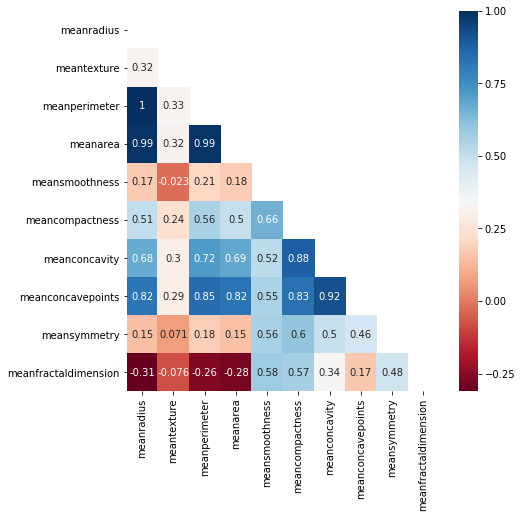

In [22]:
"""
Now here we can see better how strong is the correlation bewtween variables, so it's easier to the sight and to analyse more
in here:

When analyzing our matrix, the first time we will notice is a full correlation between perimeter, area and radius, which is
we already talked about. Therefore, this first result doesn't tell us much.

The second correlation to analyze would be the concavity with the concave points, with a puntuation of 0.92 we can know
that they are almost directly related, which is an interesting insight and would require further analysis.

Another interesting find on the matrix is how the concave points variable has high correlation to the geometrical variables
of perimeter, radius and area; its not hard to say that concave points' size is dependable on its correlated variables.

Lastly, our heatmap also remarks 3 negative correlated variables, however, by the measures on the right we can know that
the negative part has low importance (as the top value is +1 and the bottom ends in -0.25 instead of -1). Therefore, 
the best option would be to discard those correlations.
"""

# heatmap from the cancer_data_means dataframe 
mask = np.zeros_like (correlation_matrix_means, dtype = np.bool) 
mask[np.triu_indices_from (mask)] = True 
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(correlation_matrix_means, annot = True, cmap = 'RdBu', mask = mask)
plt.show()

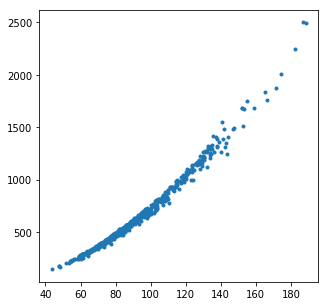

In [23]:
"""
Relation between Perimeter and Area.

As explained above, the correlation between those two values was almost complete, with a value of 0.99.
This relation, however, is easy to explain from a mathematical-geometrical perspective, making it an 'expected' outcome.
On the graph below, we can appreciate the smooth linearity of this relation.
"""
plt.rcParams['figure.figsize'] = (5, 5)
plt.plot(cancer_data_means["meanperimeter"], cancer_data_means["meanarea"],'.')
plt.show()

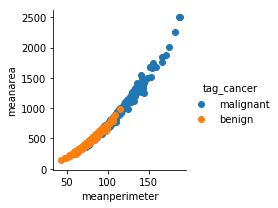

In [24]:
"""
Relation between Perimeter and Area - Classification by types of cancer.

Now that we already understood the correlation between perimeter and area, we can proceed to segment our values by types of
cancer; by doing so, we find an interesting correlation and our first valuable insight.
-----------------------------

By looking at the graph below, it is possible to say that the size is directly related to the type of cancer: the bigger
the area and perimeter, the most probable the type of cancer is malignant.
It is also easy to mentally stablish a "break point" between the types of cancer: if the area is bigger than 1000 and the 
perimeter than 120, the probability that the cancer will be malignant is almost 100%.
"""
g = sns.FacetGrid(cancer_data_means, hue = 'tag_cancer')
g = g.map(plt.scatter, "meanperimeter", "meanarea")
g = g.add_legend()
plt.show()

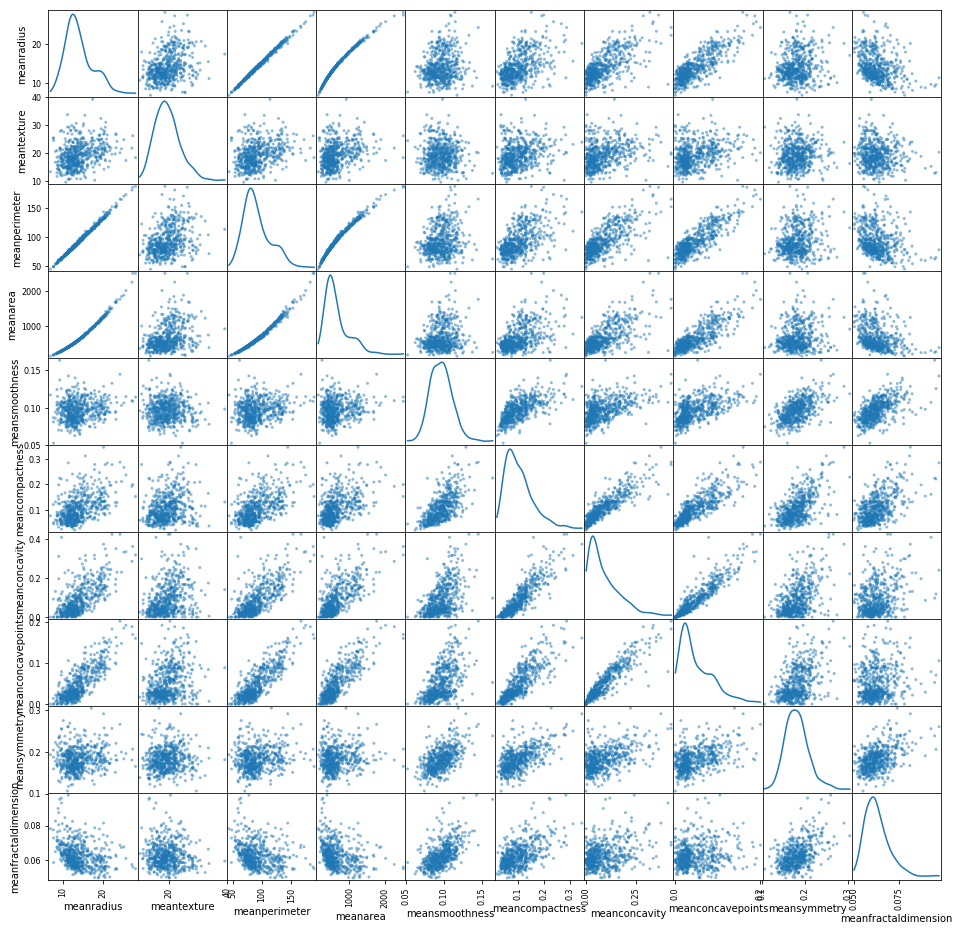

In [25]:
"""
Correlation between all our 'mean variables'.

The diagonal corresponds to the correlation of a variable with itself ( = 1).
In the top-left part of the graph, we can see some almost-straight lines in the correlations corresponding to our
geomatrical values, which was already explained.
We can see that the vast majority of variables have little correlation with other variables, but we can see sketches of 
straight-lines in the concacivity and concave points correlations.
"""
# scatter Plot
from pandas.plotting import scatter_matrix
scatter_matrix(cancer_data_means, figsize = (16, 16), diagonal='kde')
plt.show()

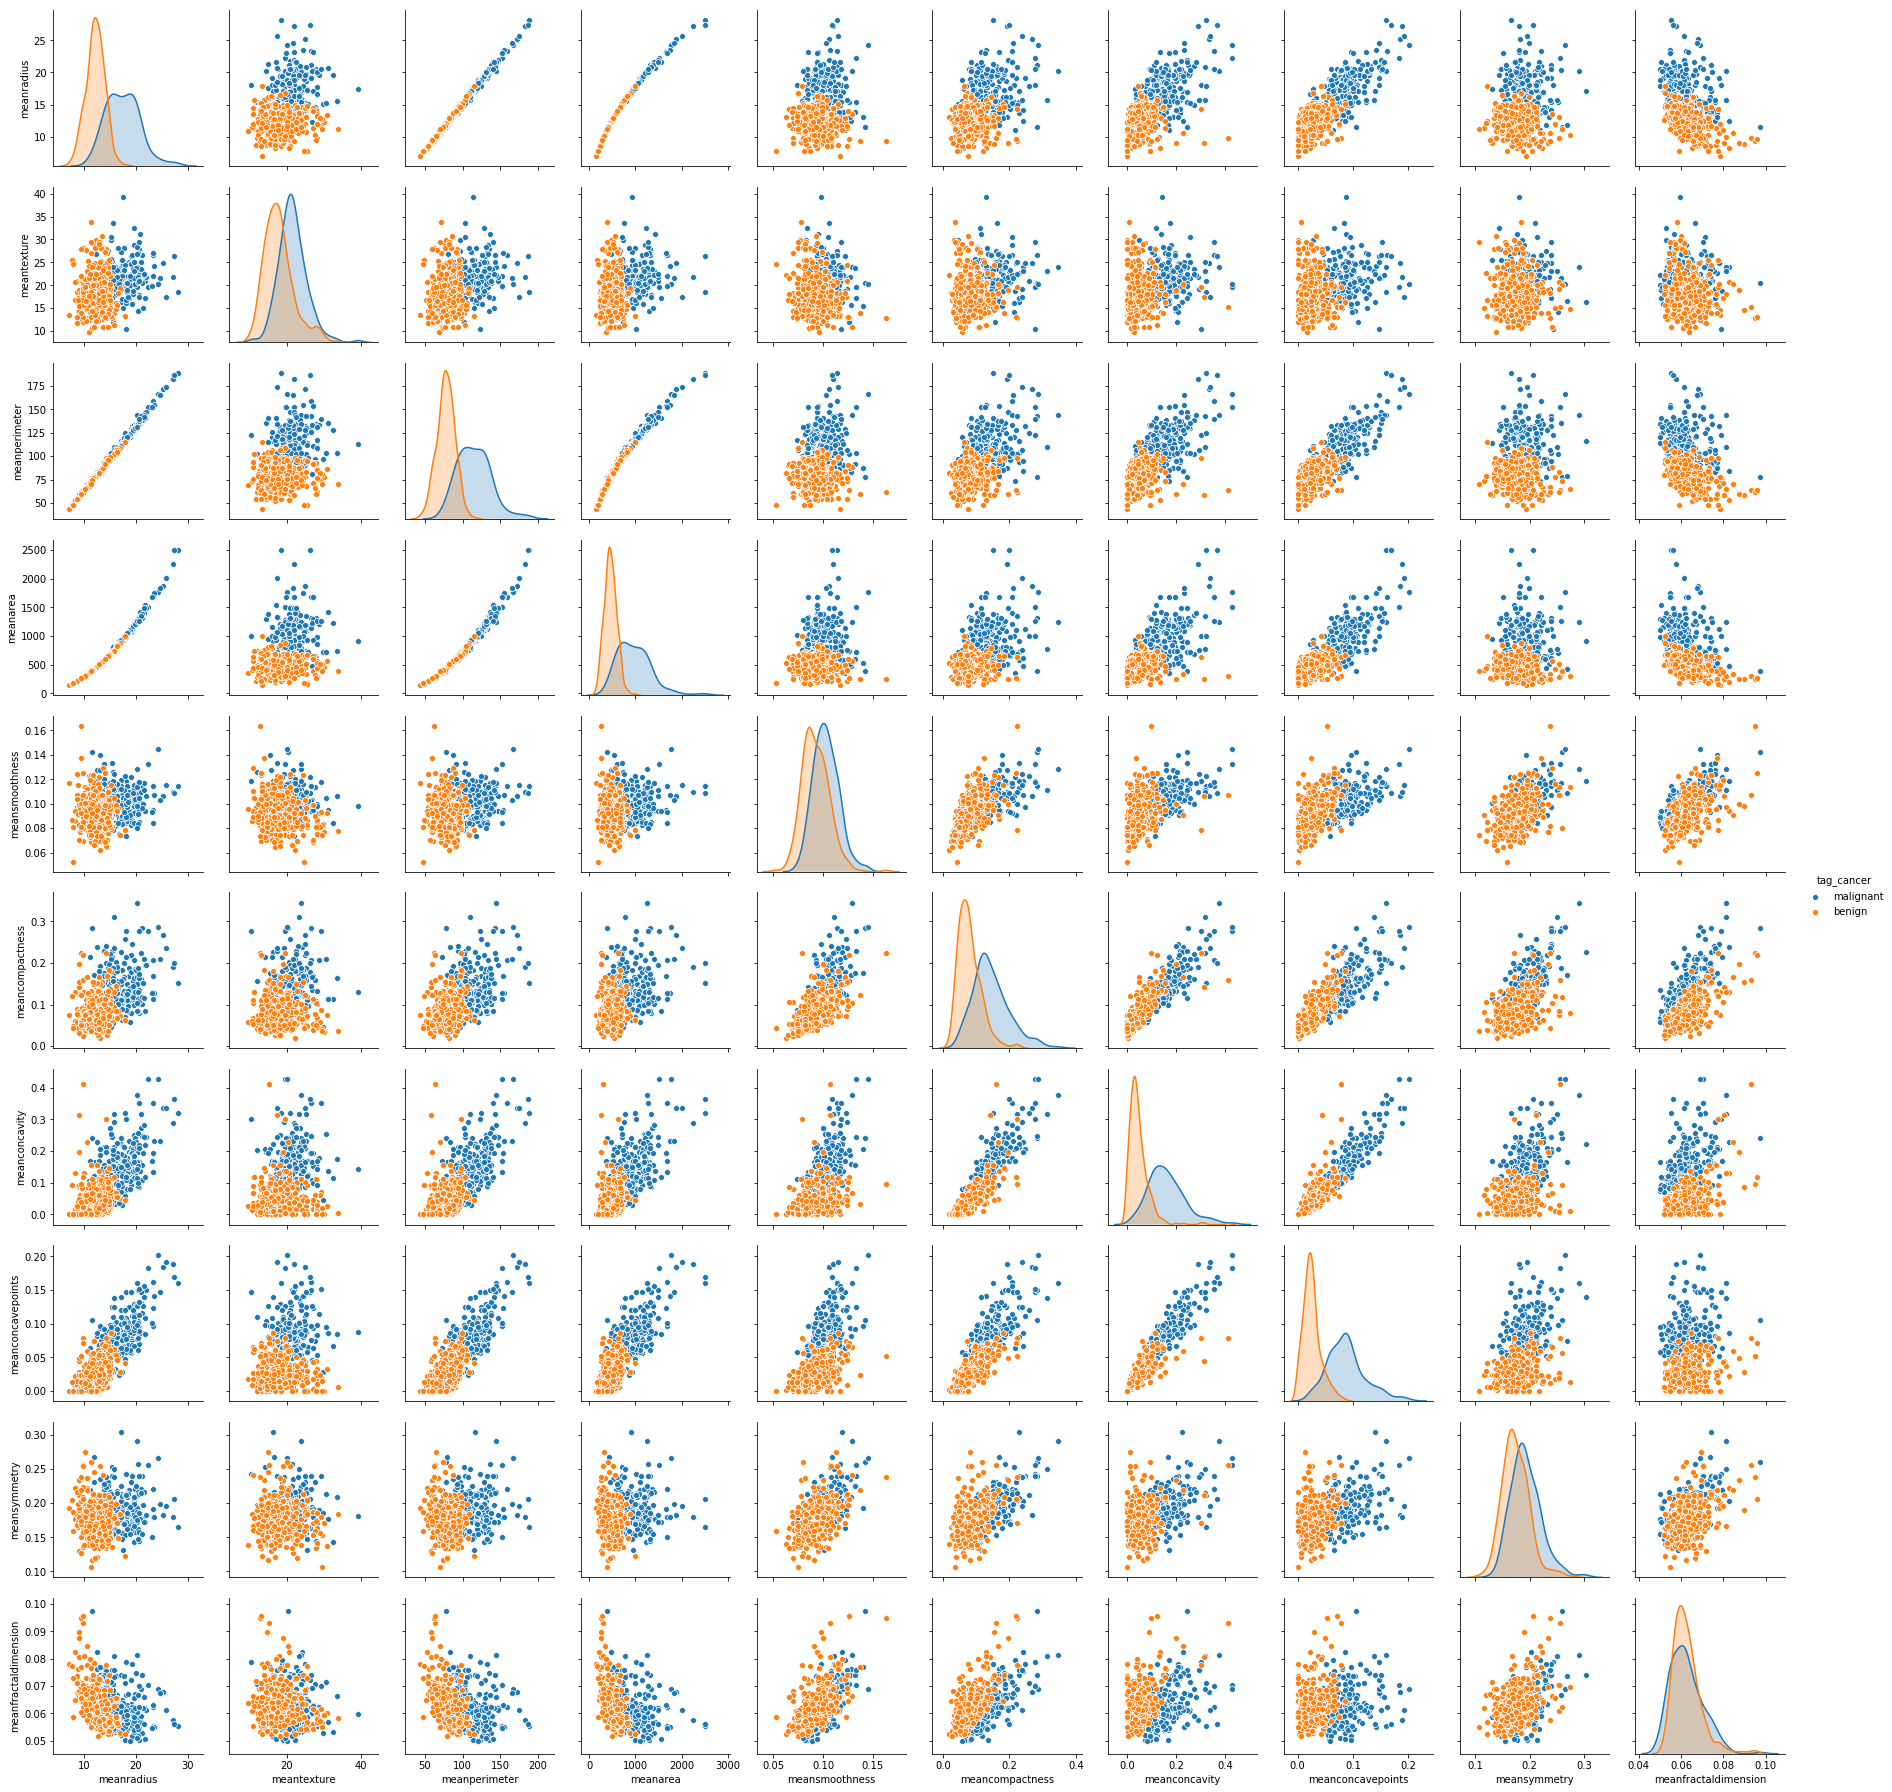

In [26]:
"""
Correlation between all our 'mean variables' - Classified by types of cancer.

Taking the last graph as base, we classified the data by types of cancer and we obtain our second valuable insight:
in the majority of correlations, the higher the values we get, the most probable is that the type of cancer corresponds to
malignant.
"""
g = sns.pairplot(cancer_data_means, hue = "tag_cancer")
plt.show()

## 2.- Dataframe with the error variables.

In [27]:
# From cancer_data, all the error variables were saved into a new data frame.
cancer_data_error = pd.DataFrame()
cancer_data_error = cancer_data[['radiuserror', 'textureerror', 'perimetererror', 'areaerror', 'smoothnesserror', 'compactnesserror', 'concavityerror', 'concavepointserror', 'symmetryerror', 'fractaldimensionerror', 'tag_cancer']]
cancer_data_error.head()

radiuserror  textureerror  perimetererror  areaerror  smoothnesserror  \
0       1.0950        0.9053           8.589     153.40         0.006399   
1       0.5435        0.7339           3.398      74.08         0.005225   
2       0.7456        0.7869           4.585      94.03         0.006150   
3       0.4956        1.1560           3.445      27.23         0.009110   
4       0.7572        0.7813           5.438      94.44         0.011490   

   compactnesserror  concavityerror  concavepointserror  symmetryerror  \
0           0.04904         0.05373             0.01587        0.03003   
1           0.01308         0.01860             0.01340        0.01389   
2           0.04006         0.03832             0.02058        0.02250   
3           0.07458         0.05661             0.01867        0.05963   
4           0.02461         0.05688             0.01885        0.01756   

   fractaldimensionerror tag_cancer  
0               0.006193  malignant  
1               0.003532  malignant  
2               0.004571  malignant  
3               0.009208  malignant  
4               0.005115  malignant

## No-Graphical Techniques of  Univariate Analysis

In [28]:
# Data Characteristics (this includes quantiles which is a kind of dispersion )
cancer_data_error.describe().T

count       mean        std       min        25%  \
radiuserror            569.0   0.405172   0.277313  0.111500   0.232400   
textureerror           569.0   1.216853   0.551648  0.360200   0.833900   
perimetererror         569.0   2.866059   2.021855  0.757000   1.606000   
areaerror              569.0  40.337079  45.491006  6.802000  17.850000   
smoothnesserror        569.0   0.007041   0.003003  0.001713   0.005169   
compactnesserror       569.0   0.025478   0.017908  0.002252   0.013080   
concavityerror         569.0   0.031894   0.030186  0.000000   0.015090   
concavepointserror     569.0   0.011796   0.006170  0.000000   0.007638   
symmetryerror          569.0   0.020542   0.008266  0.007882   0.015160   
fractaldimensionerror  569.0   0.003795   0.002646  0.000895   0.002248   

                             50%        75%        max  
radiuserror             0.324200   0.478900    2.87300  
textureerror            1.108000   1.474000    4.88500  
perimetererror          2.287000   3.357000   21.98000  
areaerror              24.530000  45.190000  542.20000  
smoothnesserror         0.006380   0.008146    0.03113  
compactnesserror        0.020450   0.032450    0.13540  
concavityerror          0.025890   0.042050    0.39600  
concavepointserror      0.010930   0.014710    0.05279  
symmetryerror           0.018730   0.023480    0.07895  
fractaldimensionerror   0.003187   0.004558    0.02984

In [29]:
#Central Tendency: Mode
cancer_data_error.mode()

radiuserror  textureerror  perimetererror  areaerror  smoothnesserror  \
0        0.2204        0.8561           1.778      16.64         0.005080   
1        0.2860        1.1500             NaN      16.97         0.005251   
2           NaN        1.2680             NaN      17.67         0.005298   
3           NaN        1.3500             NaN      18.54         0.005518   
4           NaN           NaN             NaN        NaN         0.005884   
5           NaN           NaN             NaN        NaN         0.005910   
6           NaN           NaN             NaN        NaN         0.005969   
7           NaN           NaN             NaN        NaN         0.006040   
8           NaN           NaN             NaN        NaN         0.006064   
9           NaN           NaN             NaN        NaN         0.006399   
10          NaN           NaN             NaN        NaN         0.006494   
11          NaN           NaN             NaN        NaN         0.007189   
12          NaN           NaN             NaN        NaN         0.007389   
13          NaN           NaN             NaN        NaN         0.007514   
14          NaN           NaN             NaN        NaN         0.007595   
15          NaN           NaN             NaN        NaN         0.007803   
16          NaN           NaN             NaN        NaN         0.010000   
17          NaN           NaN             NaN        NaN         0.010170   
18          NaN           NaN             NaN        NaN         0.010380   
19          NaN           NaN             NaN        NaN         0.010520   
20          NaN           NaN             NaN        NaN         0.012910   
21          NaN           NaN             NaN        NaN         0.013800   
22          NaN           NaN             NaN        NaN              NaN   
23          NaN           NaN             NaN        NaN              NaN   

    compactnesserror  concavityerror  concavepointserror  symmetryerror  \
0            0.01104             0.0                 0.0        0.01344   
1            0.01812             NaN                 NaN            NaN   
2            0.02310             NaN                 NaN            NaN   
3                NaN             NaN                 NaN            NaN   
4                NaN             NaN                 NaN            NaN   
5                NaN             NaN                 NaN            NaN   
6                NaN             NaN                 NaN            NaN   
7                NaN             NaN                 NaN            NaN   
8                NaN             NaN                 NaN            NaN   
9                NaN             NaN                 NaN            NaN   
10               NaN             NaN                 NaN            NaN   
11               NaN             NaN                 NaN            NaN   
12               NaN             NaN                 NaN            NaN   
13               NaN             NaN                 NaN            NaN   
14               NaN             NaN                 NaN            NaN   
15               NaN             NaN                 NaN            NaN   
16               NaN             NaN                 NaN            NaN   
17               NaN             NaN                 NaN            NaN   
18               NaN             NaN                 NaN            NaN   
19               NaN             NaN                 NaN            NaN   
20               NaN             NaN                 NaN            NaN   
21               NaN             NaN                 NaN            NaN   
22               NaN             NaN                 NaN            NaN   
23               NaN             NaN                 NaN            NaN   

    fractaldimensionerror tag_cancer  
0                0.001784     benign  
1                0.001892        NaN  
2                0.001906        NaN  
3                0.001956        NaN  
4      

In [30]:
#Central Tendency: median
cancer_data_error.median()

radiuserror               0.324200
textureerror              1.108000
perimetererror            2.287000
areaerror                24.530000
smoothnesserror           0.006380
compactnesserror          0.020450
concavityerror            0.025890
concavepointserror        0.010930
symmetryerror             0.018730
fractaldimensionerror     0.003187
dtype: float64

In [31]:
#Skew
"""
Remember that skewness is:
ASF > 0, Positive Asymmetry.
ASF < 0, Negative Assymetry.
ASF = 0, Assymetric

In the dataframe all of our data is not symmetrical and is positive Asymmetry  which means that the the right side of the 
distribution is longer or fatter, so the mean and median will be greater than the mode.
"""
skew_error_data = cancer_data_error.skew()
skew_error_data

radiuserror              3.088612
textureerror             1.646444
perimetererror           3.443615
areaerror                5.447186
smoothnesserror          2.314450
compactnesserror         1.902221
concavityerror           5.110463
concavepointserror       1.444678
symmetryerror            2.195133
fractaldimensionerror    3.923969
dtype: float64

In [32]:
#Kurtosis
"""
It is actually the measure of outliers present in the distribution
Ap > 3, Leptokurtic means that data are heavy-tailed or profusion of outliers.
Ap < 3, Platikurtic means the distribution produces fewer and less extreme outliers than does the normal distribution
Ap = 3, Mesokurtic  means means that if the data follows a normal distribution

All of our data more than 3 meaning that we have heavy-tailed or profusion of outliers which is bad for the analysis, 
If there is a high kurtosis, then, we need to investigate why do we have so many outliers. It indicates a lot of things, 
maybe wrong data entry or other things.
"""
kurtosis_error_data = cancer_data_error.kurtosis()
kurtosis_error_data

radiuserror              17.686726
textureerror              5.349169
perimetererror           21.401905
areaerror                49.209077
smoothnesserror          10.469840
compactnesserror          5.106252
concavityerror           48.861395
concavepointserror        5.126302
symmetryerror             7.896130
fractaldimensionerror    26.280847
dtype: float64

## Graphical Techniques of  Univariate Analysis

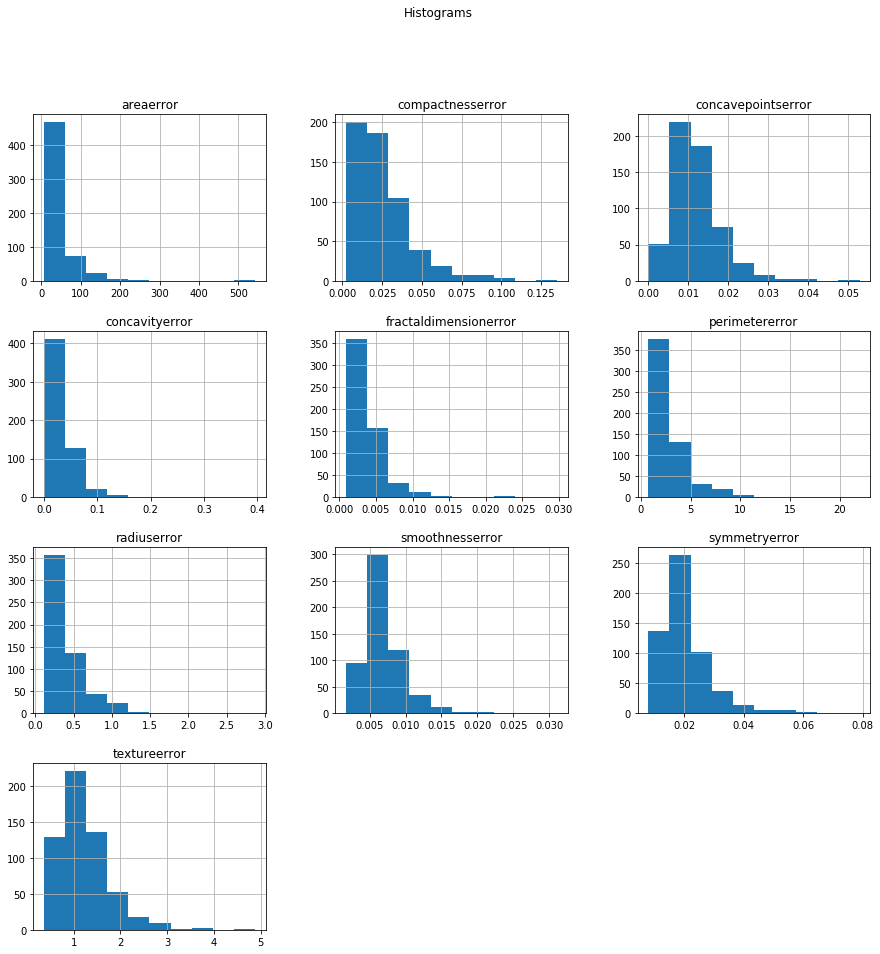

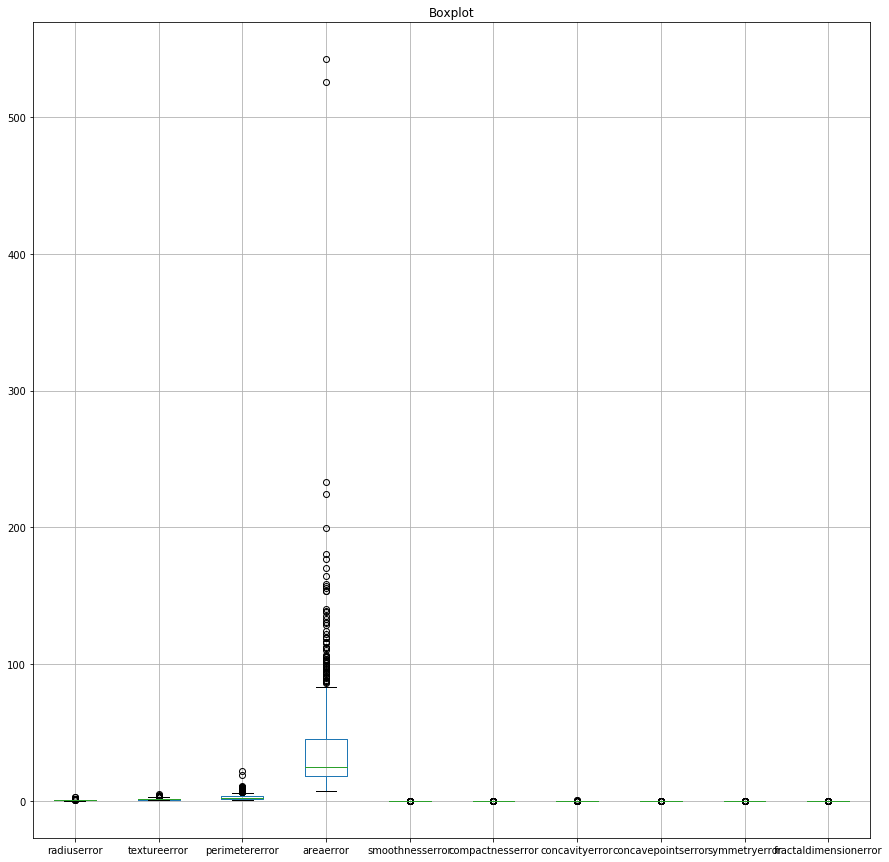

In [33]:
cancer_data_error.hist(figsize = (15, 15))
plt.suptitle("Histograms")
plt.show()
"""
As we already saw in the skew we can see how our data is concentrated in the left side.
"""

cancer_data_error.boxplot(figsize = (15, 15))
plt.title("Boxplot")
plt.show()

## No-Graphical Techniques of  Multivariate Analysis

In [34]:
# correlation 
"""
Remember taht correlation is:
is a statistical measure that indicates how strongly two variables are related.
value > 0 and value =< 1: means that as one variable gets larger the other gets larger: possitive correlation
values < 0 and values >= -1: means that as one gets larger, the other gets smaller: negative correlation
value = 0: means there is no relationship between the variables: zero correlation

Again, we have the biggest correlation between area and perimeter and perimeter and radius. But the two with a good 
correlation coefficient are compactnesserror with compactnesserror and also with fractaldimensionerror therefore we can use 
them for better tests.
"""
correlation_matrix_error = cancer_data_error.corr()
correlation_matrix_error

radiuserror  textureerror  perimetererror  areaerror  \
radiuserror               1.000000      0.213247        0.972794   0.951830   
textureerror              0.213247      1.000000        0.223171   0.111567   
perimetererror            0.972794      0.223171        1.000000   0.937655   
areaerror                 0.951830      0.111567        0.937655   1.000000   
smoothnesserror           0.164514      0.397243        0.151075   0.075150   
compactnesserror          0.356065      0.231700        0.416322   0.284840   
concavityerror            0.332358      0.194998        0.362482   0.270895   
concavepointserror        0.513346      0.230283        0.556264   0.415730   
symmetryerror             0.240567      0.411621        0.266487   0.134109   
fractaldimensionerror     0.227754      0.279723        0.244143   0.127071   

                       smoothnesserror  compactnesserror  concavityerror  \
radiuserror                   0.164514          0.356065        0.332358   
textureerror                  0.397243          0.231700        0.194998   
perimetererror                0.151075          0.416322        0.362482   
areaerror                     0.075150          0.284840        0.270895   
smoothnesserror               1.000000          0.336696        0.268685   
compactnesserror              0.336696          1.000000        0.801268   
concavityerror                0.268685          0.801268        1.000000   
concavepointserror            0.328429          0.744083        0.771804   
symmetryerror                 0.413506          0.394713        0.309429   
fractaldimensionerror         0.427374          0.803269        0.727372   

                       concavepointserror  symmetryerror  \
radiuserror                      0.513346       0.240567   
textureerror                     0.230283       0.411621   
perimetererror                   0.556264       0.266487   
areaerror                        0.415730       0.134109   
smoothnesserror                  0.328429       0.413506   
compactnesserror                 0.744083       0.394713   
concavityerror                   0.771804       0.309429   
concavepointserror               1.000000       0.312780   
symmetryerror                    0.312780       1.000000   
fractaldimensionerror            0.611044       0.369078   

                       fractaldimensionerror  
radiuserror                         0.227754  
textureerror                        0.279723  
perimetererror                      0.244143  
areaerror                           0.127071  
smoothnesserror                     0.427374  
compactnesserror                    0.803269  
concavityerror                      0.727372  
concavepointserror                  0.611044  
symmetryerror                       0.369078  
fractaldimensionerror               1.000000

In [35]:
# covariance
"""
Remember taht covariance is:
is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a 
single variable varies, co variance tells you how two variables vary together.
value > 0: y increases and x decreases: large possitive covariance
values < 0: y decreases and x increases: large negative covariance
value = 0: there is no linear tendency: nearly zero covariance

Mostly we have nearly to zeros which means we don't have a linear tendency and that the change in one variable doesn't causes 
change in another variable. The only one with a large positive is areaerror with the obvious ones (radiuserror and 
perimetererror).
"""
covariance_matrix_error = cancer_data_error.cov()
covariance_matrix_error

radiuserror  textureerror  perimetererror    areaerror  \
radiuserror               0.076902      0.032622        0.545432    12.007561   
textureerror              0.032622      0.304316        0.248914     2.799785   
perimetererror            0.545432      0.248914        4.087896    86.241978   
areaerror                12.007561      2.799785       86.241978  2069.431583   
smoothnesserror           0.000137      0.000658        0.000917     0.010265   
compactnesserror          0.001768      0.002289        0.015074     0.232048   
concavityerror            0.002782      0.003247        0.022123     0.371991   
concavepointserror        0.000878      0.000784        0.006940     0.116692   
symmetryerror             0.000551      0.001877        0.004454     0.050431   
fractaldimensionerror     0.000167      0.000408        0.001306     0.015296   

                       smoothnesserror  compactnesserror  concavityerror  \
radiuserror                   0.000137          0.001768        0.002782   
textureerror                  0.000658          0.002289        0.003247   
perimetererror                0.000917          0.015074        0.022123   
areaerror                     0.010265          0.232048        0.371991   
smoothnesserror               0.000009          0.000018        0.000024   
compactnesserror              0.000018          0.000321        0.000433   
concavityerror                0.000024          0.000433        0.000911   
concavepointserror            0.000006          0.000082        0.000144   
symmetryerror                 0.000010          0.000058        0.000077   
fractaldimensionerror         0.000003          0.000038        0.000058   

                       concavepointserror  symmetryerror  \
radiuserror                      0.000878       0.000551   
textureerror                     0.000784       0.001877   
perimetererror                   0.006940       0.004454   
areaerror                        0.116692       0.050431   
smoothnesserror                  0.000006       0.000010   
compactnesserror                 0.000082       0.000058   
concavityerror                   0.000144       0.000077   
concavepointserror               0.000038       0.000016   
symmetryerror                    0.000016       0.000068   
fractaldimensionerror            0.000010       0.000008   

                       fractaldimensionerror  
radiuserror                         0.000167  
textureerror                        0.000408  
perimetererror                      0.001306  
areaerror                           0.015296  
smoothnesserror                     0.000003  
compactnesserror                    0.000038  
concavityerror                      0.000058  
concavepointserror                  0.000010  
symmetryerror                       0.000008  
fractaldimensionerror               0.000007

## Graphical Techniques of  Multivariate Analysis

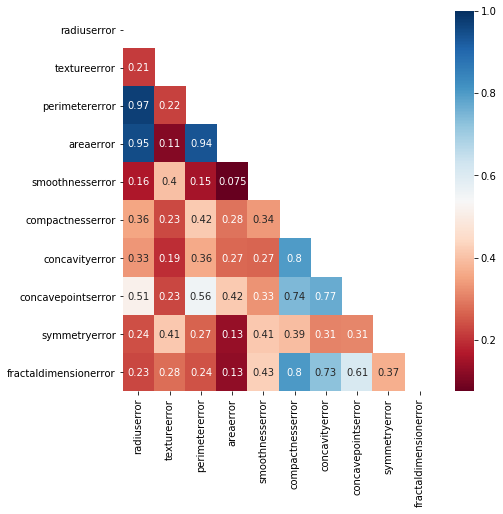

In [36]:
"""
The second matrix analyzed was of the "error variables", refering to how errors have correlation between different variables.

Again, there is a strong correlation between geometrical variables; and there is no negative correlations.
The most remarkable correlations are of compactness with fractal dimension and with concavity, both with a 0.8 value. 

"""

# Heatmap
mask = np.zeros_like (correlation_matrix_error, dtype = np.bool) 
mask[np.triu_indices_from (mask)] = True 
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(correlation_matrix_error, annot = True, cmap = 'RdBu', mask = mask)
plt.show()

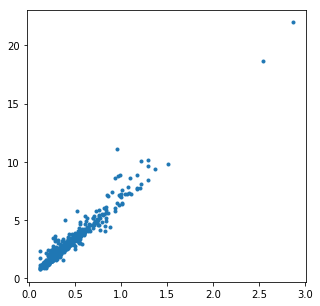

In [37]:
#Biggest correlation of the dataframe
"""
Here we show the biggest correlation out of all the data frame which are radiuserror and perimetererror with a .97 of 
correlation coefficient.
"""
plt.rcParams['figure.figsize'] = (5, 5)
plt.plot(cancer_data_error["radiuserror"], cancer_data_error["perimetererror"],'.')
plt.show()

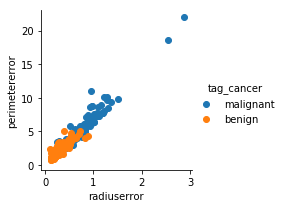

In [38]:
#Biggest correlation of the dataframe with the tag_cancer
"""
As explained above, there is a correlation between higher values in certain correlations and the type of cancer we are
analyzing.
"""
g1 = sns.FacetGrid(cancer_data_error, hue = 'tag_cancer')
g1 = g1.map(plt.scatter, "radiuserror", "perimetererror")
g1 = g1.add_legend()
plt.show()

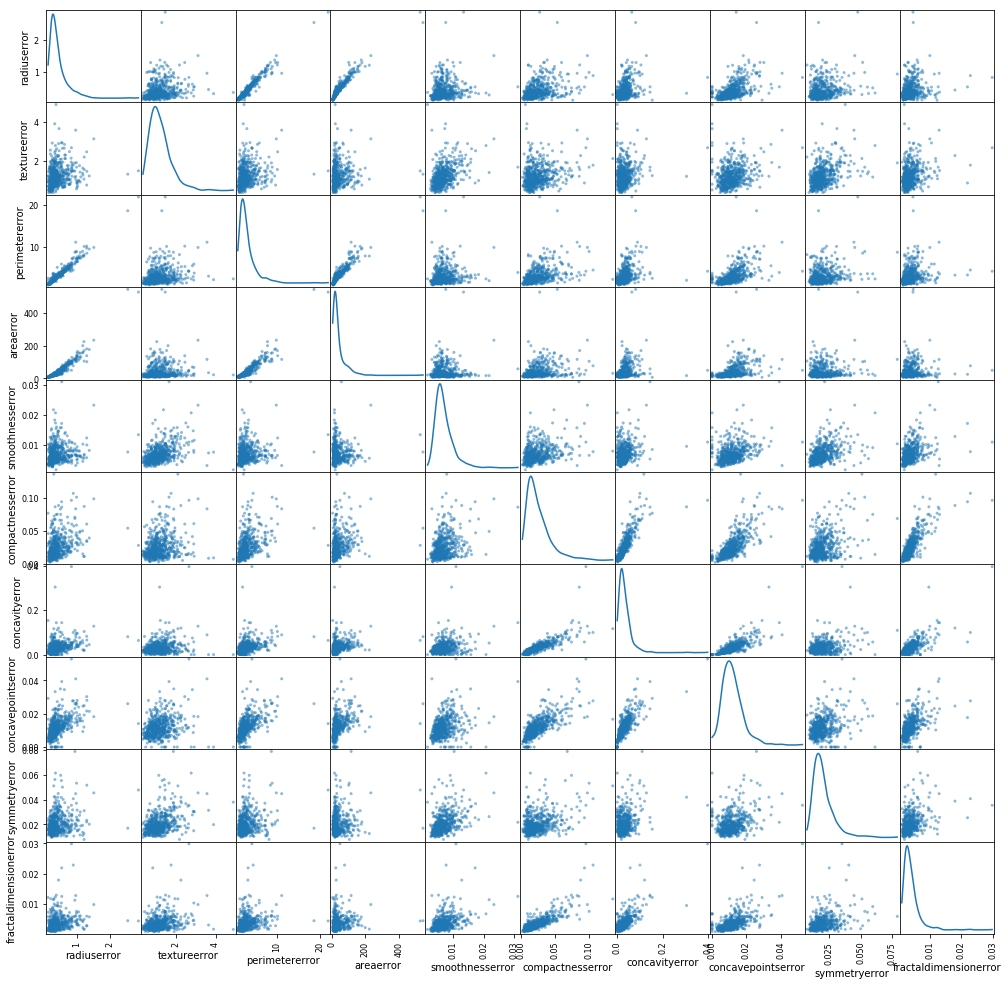

In [39]:
"""
Correlation between all our 'error variables'.

The same logic from the previous similar graph seems to apply for this one.
"""
# scatter Plot
from pandas.plotting import scatter_matrix
scatter_matrix(cancer_data_error, figsize = (17, 17), diagonal='kde')
plt.show()

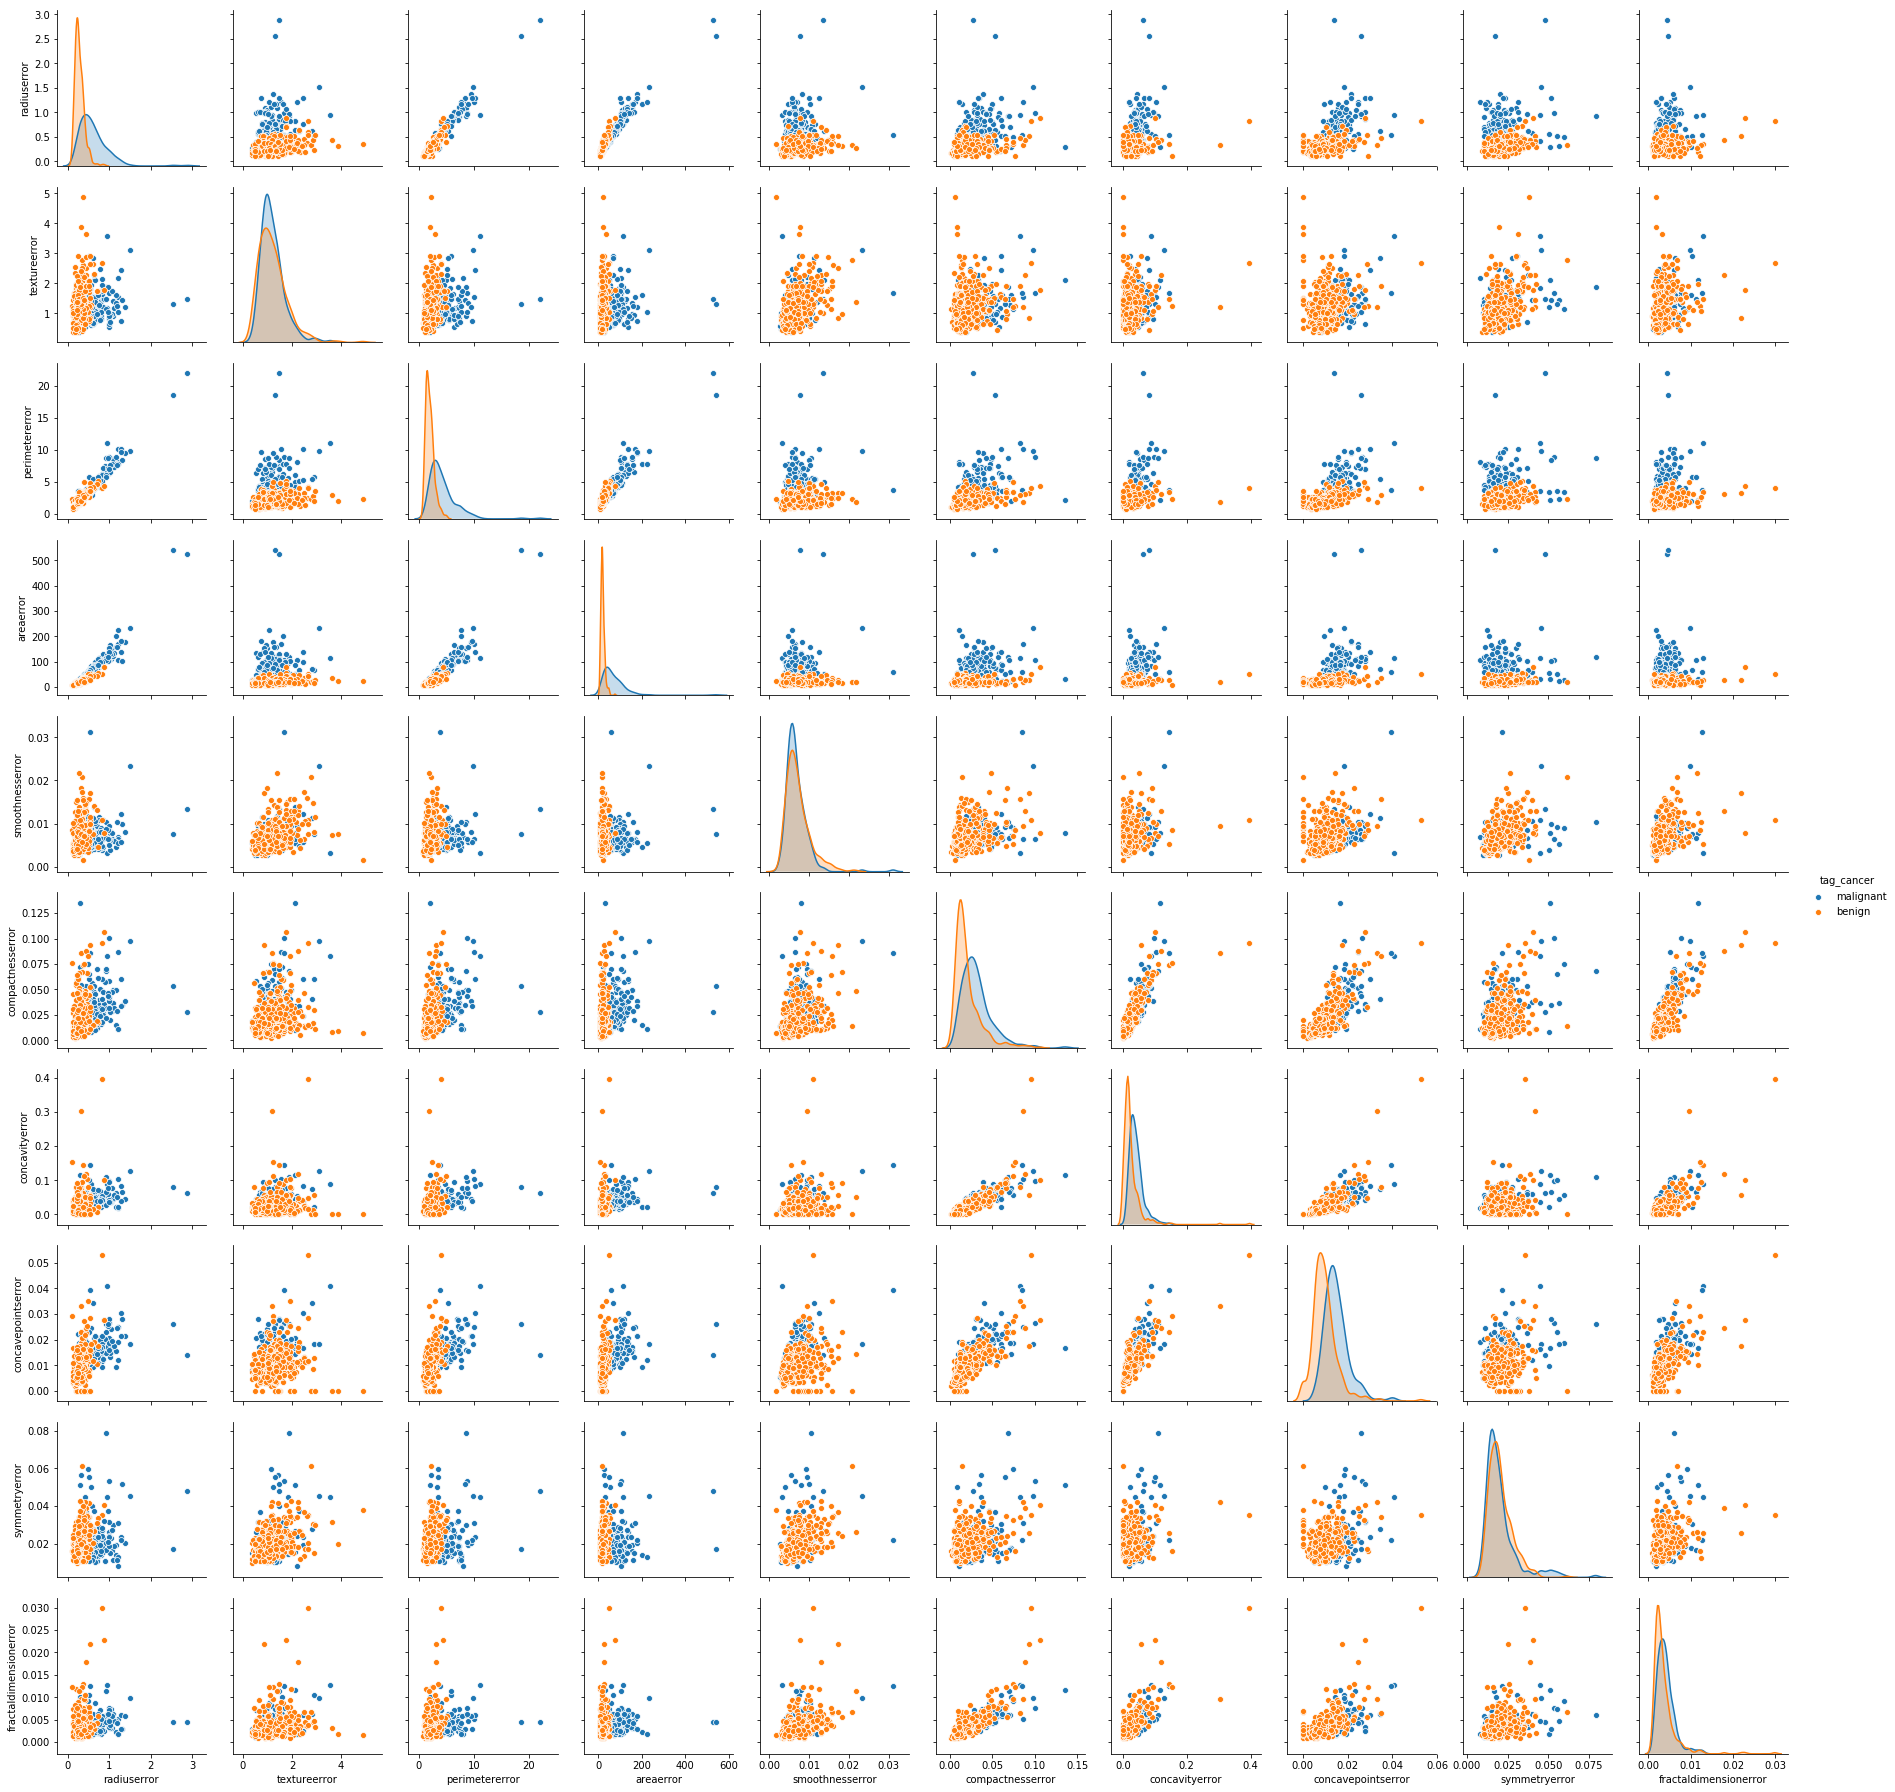

In [40]:
"""
Correlation between all our 'error variables' - Classified by types of cancer.

There is a notable difference between this graph and the previous ones: the correlation between higher values and types of
cancer seems to not apply here for other than the geometrical variables. 
This would require further analysis.
"""
g1 = sns.pairplot(cancer_data_error, hue = "tag_cancer")
plt.show()

## 3.- Dataframe with the worst variables.

In [41]:
# From cancer_data, all the worst variables were saved into a new data frame.
cancer_data_worst = pd.DataFrame()
cancer_data_worst = cancer_data[['worstradius', 'worsttexture', 'worstperimeter', 'worstarea',
       'worstsmoothness', 'worstcompactness', 'worstconcavity',
       'worstconcavepoints', 'worstsymmetry', 'worstfractaldimension', 'tag_cancer']]
cancer_data_worst.head()

worstradius  worsttexture  worstperimeter  worstarea  worstsmoothness  \
0        25.38         17.33          184.60     2019.0           0.1622   
1        24.99         23.41          158.80     1956.0           0.1238   
2        23.57         25.53          152.50     1709.0           0.1444   
3        14.91         26.50           98.87      567.7           0.2098   
4        22.54         16.67          152.20     1575.0           0.1374   

   worstcompactness  worstconcavity  worstconcavepoints  worstsymmetry  \
0            0.6656          0.7119              0.2654         0.4601   
1            0.1866          0.2416              0.1860         0.2750   
2            0.4245          0.4504              0.2430         0.3613   
3            0.8663          0.6869              0.2575         0.6638   
4            0.2050          0.4000              0.1625         0.2364   

   worstfractaldimension tag_cancer  
0                0.11890  malignant  
1                0.08902  malignant  
2                0.08758  malignant  
3                0.17300  malignant  
4                0.07678  malignant

## No-Graphical Techniques of  Univariate Analysis

In [42]:
# Data Characteristics (this includes quantiles which is a kind of dispersion )
cancer_data_worst.describe().T

count        mean         std        min        25%  \
worstradius            569.0   16.269190    4.833242    7.93000   13.01000   
worsttexture           569.0   25.677223    6.146258   12.02000   21.08000   
worstperimeter         569.0  107.261213   33.602542   50.41000   84.11000   
worstarea              569.0  880.583128  569.356993  185.20000  515.30000   
worstsmoothness        569.0    0.132369    0.022832    0.07117    0.11660   
worstcompactness       569.0    0.254265    0.157336    0.02729    0.14720   
worstconcavity         569.0    0.272188    0.208624    0.00000    0.11450   
worstconcavepoints     569.0    0.114606    0.065732    0.00000    0.06493   
worstsymmetry          569.0    0.290076    0.061867    0.15650    0.25040   
worstfractaldimension  569.0    0.083946    0.018061    0.05504    0.07146   

                             50%         75%        max  
worstradius             14.97000    18.79000    36.0400  
worsttexture            25.41000    29.72000    49.5400  
worstperimeter          97.66000   125.40000   251.2000  
worstarea              686.50000  1084.00000  4254.0000  
worstsmoothness          0.13130     0.14600     0.2226  
worstcompactness         0.21190     0.33910     1.0580  
worstconcavity           0.22670     0.38290     1.2520  
worstconcavepoints       0.09993     0.16140     0.2910  
worstsymmetry            0.28220     0.31790     0.6638  
worstfractaldimension    0.08004     0.09208     0.2075

In [43]:
#Central Tendency: Mode
cancer_data_worst.mode()

worstradius  worsttexture  worstperimeter  worstarea  worstsmoothness  \
0         12.36         17.70           101.7      284.4           0.1216   
1           NaN         27.26           105.9      402.8           0.1223   
2           NaN           NaN           117.7      439.6           0.1234   
3           NaN           NaN             NaN      458.0           0.1256   
4           NaN           NaN             NaN      472.4           0.1275   
5           NaN           NaN             NaN      489.5           0.1312   
6           NaN           NaN             NaN      546.7           0.1347   
7           NaN           NaN             NaN      547.4           0.1401   
8           NaN           NaN             NaN      624.1           0.1415   
9           NaN           NaN             NaN      698.8              NaN   
10          NaN           NaN             NaN      706.0              NaN   
11          NaN           NaN             NaN      708.8              NaN   
12          NaN           NaN             NaN      725.9              NaN   
13          NaN           NaN             NaN      733.5              NaN   
14          NaN           NaN             NaN      749.9              NaN   
15          NaN           NaN             NaN      808.9              NaN   
16          NaN           NaN             NaN      826.4              NaN   
17          NaN           NaN             NaN      830.5              NaN   
18          NaN           NaN             NaN     1210.0              NaN   
19          NaN           NaN             NaN     1261.0              NaN   
20          NaN           NaN             NaN     1269.0              NaN   
21          NaN           NaN             NaN     1437.0              NaN   
22          NaN           NaN             NaN     1603.0              NaN   
23          NaN           NaN             NaN     1623.0              NaN   
24          NaN           NaN             NaN     1750.0              NaN   

    worstcompactness  worstconcavity  worstconcavepoints  worstsymmetry  \
0             0.1486             0.0                 0.0         0.2226   
1             0.3416             NaN                 NaN         0.2369   
2                NaN             NaN                 NaN         0.2383   
3                NaN             NaN                 NaN         0.2972   
4                NaN             NaN                 NaN         0.3109   
5                NaN             NaN                 NaN         0.3196   
6                NaN             NaN                 NaN            NaN   
7                NaN             NaN                 NaN            NaN   
8                NaN             NaN                 NaN            NaN   
9                NaN             NaN                 NaN            NaN   
10               NaN             NaN                 NaN            NaN   
11               NaN             NaN                 NaN            NaN   
12               NaN             NaN                 NaN            NaN   
13               NaN             NaN                 NaN            NaN   
14               NaN             NaN                 NaN            NaN   
15               NaN             NaN                 NaN            NaN   
16               NaN             NaN                 NaN            NaN   
17               NaN             NaN                 NaN            NaN   
18               NaN             NaN                 NaN            NaN   
19               NaN             NaN                 NaN            NaN   
20               NaN             NaN                 NaN            NaN   
21               NaN             NaN                 NaN            NaN   
22               NaN             NaN                 NaN            NaN   
23               NaN             NaN                 NaN            NaN   
24               NaN             NaN                 NaN            NaN   

    worstfractaldimension tag_cancer  
0          

In [44]:
#Central Tendency: median
cancer_data_worst.median()

worstradius               14.97000
worsttexture              25.41000
worstperimeter            97.66000
worstarea                686.50000
worstsmoothness            0.13130
worstcompactness           0.21190
worstconcavity             0.22670
worstconcavepoints         0.09993
worstsymmetry              0.28220
worstfractaldimension      0.08004
dtype: float64

In [45]:
#Skew
"""
Remember that skewness is:
ASF > 0, Positive Asymmetry.
ASF < 0, Negative Assymetry.
ASF = 0, Assymetric.

As in the dataframe from above, we can see how all of our data is not symmetrical and is positive Asymmetry  which means 
that the the right side of the distribution is longer or fatter, so the mean and median will be greater than the mode. The 
difference here is that we have at least two variable how are just a little bit up than 0, so they tend to be almost symetrical.
"""
skew_worst_data = cancer_data_worst.skew()
skew_worst_data

worstradius              1.103115
worsttexture             0.498321
worstperimeter           1.128164
worstarea                1.859373
worstsmoothness          0.415426
worstcompactness         1.473555
worstconcavity           1.150237
worstconcavepoints       0.492616
worstsymmetry            1.433928
worstfractaldimension    1.662579
dtype: float64

In [46]:
#Kurtosis
"""
It is actually the measure of outliers present in the distribution
Ap > 3, Leptokurtic means that data are heavy-tailed or profusion of outliers.
Ap < 3, Platikurtic means the distribution produces fewer and less extreme outliers than does the normal distribution
Ap = 3, Mesokurtic  means means that if the data follows a normal distribution

Most of our data is less than 3 meaning that we have fewer and less extreme outliers which is too good for the analysis, 
So, we need to be suspecious and need to investigate and trim the dataset of unwanted results
"""

kurtosis_worst_data = cancer_data_worst.kurtosis()
kurtosis_worst_data

worstradius              0.944090
worsttexture             0.224302
worstperimeter           1.070150
worstarea                4.396395
worstsmoothness          0.517825
worstcompactness         3.039288
worstconcavity           1.615253
worstconcavepoints      -0.535535
worstsymmetry            4.444560
worstfractaldimension    5.244611
dtype: float64

## Graphical Techniques of  Univariate Analysis

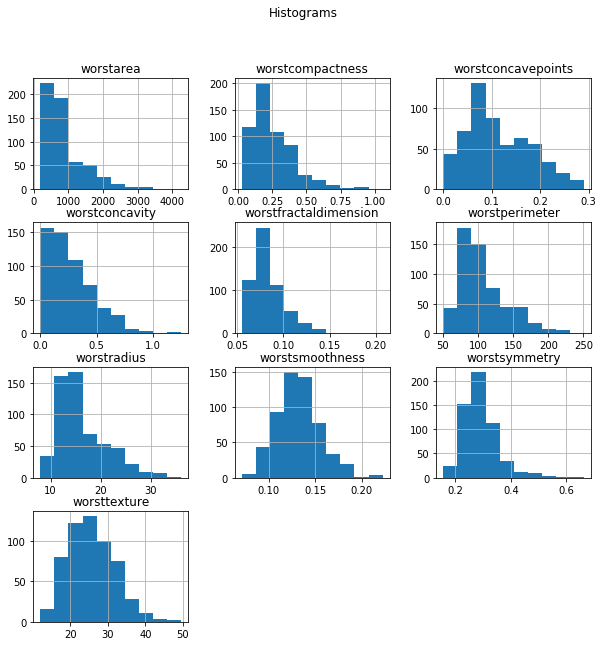

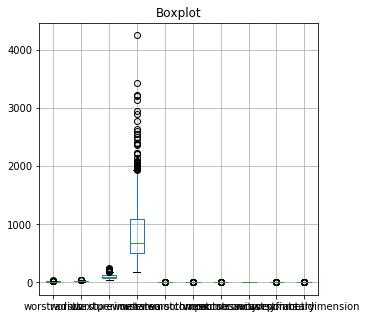

In [47]:
cancer_data_worst.hist(figsize = (10, 10))
plt.suptitle("Histograms")
plt.show()

"""
Here we can prove what we already saw on the tables above.
"""

cancer_data_worst.boxplot()
plt.title("Boxplot")
plt.show()

## No-Graphical Techniques of  Multivariate Analysis

In [48]:
# correlation 
"""
Remember taht correlation is:
is a statistical measure that indicates how strongly two variables are related.
value > 0 and value =< 1: means that as one variable gets larger the other gets larger: possitive correlation
values < 0 and values >= -1: means that as one gets larger, the other gets smaller: negative correlation
value = 0: means there is no relationship between the variables: zero correlation

Again, we have the biggest correlation between area and perimeter and perimeter and radius. But the two with a good 
correlation coefficient are worstcompactness with worstconcavity which are differents from the last data frame. 
them for better tests.
"""
correlation_matrix_worst = cancer_data_worst.corr()
correlation_matrix_worst

worstradius  worsttexture  worstperimeter  worstarea  \
worstradius               1.000000      0.359921        0.993708   0.984015   
worsttexture              0.359921      1.000000        0.365098   0.345842   
worstperimeter            0.993708      0.365098        1.000000   0.977578   
worstarea                 0.984015      0.345842        0.977578   1.000000   
worstsmoothness           0.216574      0.225429        0.236775   0.209145   
worstcompactness          0.475820      0.360832        0.529408   0.438296   
worstconcavity            0.573975      0.368366        0.618344   0.543331   
worstconcavepoints        0.787424      0.359755        0.816322   0.747419   
worstsymmetry             0.243529      0.233027        0.269493   0.209146   
worstfractaldimension     0.093492      0.219122        0.138957   0.079647   

                       worstsmoothness  worstcompactness  worstconcavity  \
worstradius                   0.216574          0.475820        0.573975   
worsttexture                  0.225429          0.360832        0.368366   
worstperimeter                0.236775          0.529408        0.618344   
worstarea                     0.209145          0.438296        0.543331   
worstsmoothness               1.000000          0.568187        0.518523   
worstcompactness              0.568187          1.000000        0.892261   
worstconcavity                0.518523          0.892261        1.000000   
worstconcavepoints            0.547691          0.801080        0.855434   
worstsymmetry                 0.493838          0.614441        0.532520   
worstfractaldimension         0.617624          0.810455        0.686511   

                       worstconcavepoints  worstsymmetry  \
worstradius                      0.787424       0.243529   
worsttexture                     0.359755       0.233027   
worstperimeter                   0.816322       0.269493   
worstarea                        0.747419       0.209146   
worstsmoothness                  0.547691       0.493838   
worstcompactness                 0.801080       0.614441   
worstconcavity                   0.855434       0.532520   
worstconcavepoints               1.000000       0.502528   
worstsymmetry                    0.502528       1.000000   
worstfractaldimension            0.511114       0.537848   

                       worstfractaldimension  
worstradius                         0.093492  
worsttexture                        0.219122  
worstperimeter                      0.138957  
worstarea                           0.079647  
worstsmoothness                     0.617624  
worstcompactness                    0.810455  
worstconcavity                      0.686511  
worstconcavepoints                  0.511114  
worstsymmetry                       0.537848  
worstfractaldimension               1.000000

In [49]:
# covariance
"""
Remember taht covariance is:
is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a 
single variable varies, co variance tells you how two variables vary together.
value > 0: y increases and x decreases: large possitive covariance
values < 0: y decreases and x increases: large negative covariance
value = 0: there is no linear tendency: nearly zero covariance

Now we have better results compared to the last data frame, still they aren't the best, we still have more nearly zeros.
Meaning we don't have a linear tendency and that the change in one variable doesn't causes change in another variable. 
"""
covariance_matrix_worst = cancer_data_worst.cov()
covariance_matrix_worst

worstradius  worsttexture  worstperimeter  \
worstradius              23.360224     10.691931      161.387312   
worsttexture             10.691931     37.776483       75.403697   
worstperimeter          161.387312     75.403697     1129.130847   
worstarea              2707.850532   1210.245587    18702.869991   
worstsmoothness           0.023900      0.031635        0.181660   
worstcompactness          0.361835      0.348936        2.798929   
worstconcavity            0.578757      0.472340        4.334781   
worstconcavepoints        0.250165      0.145344        1.803071   
worstsymmetry             0.072820      0.088609        0.560250   
worstfractaldimension     0.008161      0.024325        0.084334   

                           worstarea  worstsmoothness  worstcompactness  \
worstradius              2707.850532         0.023900          0.361835   
worsttexture             1210.245587         0.031635          0.348936   
worstperimeter          18702.869991         0.181660          2.798929   
worstarea              324167.385102         2.718848         39.262857   
worstsmoothness             2.718848         0.000521          0.002041   
worstcompactness           39.262857         0.002041          0.024755   
worstconcavity             64.537720         0.002470          0.029288   
worstconcavepoints         27.972274         0.000822          0.008285   
worstsymmetry               7.367083         0.000698          0.005981   
worstfractaldimension       0.819035         0.000255          0.002303   

                       worstconcavity  worstconcavepoints  worstsymmetry  \
worstradius                  0.578757            0.250165       0.072820   
worsttexture                 0.472340            0.145344       0.088609   
worstperimeter               4.334781            1.803071       0.560250   
worstarea                   64.537720           27.972274       7.367083   
worstsmoothness              0.002470            0.000822       0.000698   
worstcompactness             0.029288            0.008285       0.005981   
worstconcavity               0.043524            0.011731       0.006873   
worstconcavepoints           0.011731            0.004321       0.002044   
worstsymmetry                0.006873            0.002044       0.003828   
worstfractaldimension        0.002587            0.000607       0.000601   

                       worstfractaldimension  
worstradius                         0.008161  
worsttexture                        0.024325  
worstperimeter                      0.084334  
worstarea                           0.819035  
worstsmoothness                     0.000255  
worstcompactness                    0.002303  
worstconcavity                      0.002587  
worstconcavepoints                  0.000607  
worstsymmetry                       0.000601  
worstfractaldimension               0.000326

## Graphical Techniques of  Multivariate Analysis

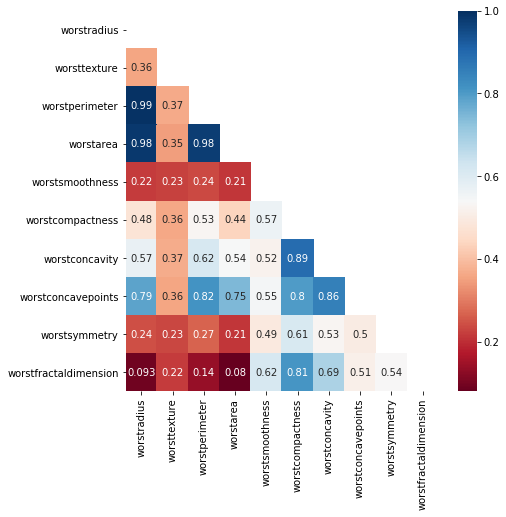

In [50]:
"""
The last matrix to analyze is of the "worst variables".

Correlation of geometrical values stay the same as before.
Correlation of compactness now is high with three different variables: fractal dimension, concave points and concavity (+0.8).
There is also a high correlation between concavepoints and concavity (.86)
"""

# Heatmap
mask = np.zeros_like (correlation_matrix_worst, dtype = np.bool) 
mask[np.triu_indices_from (mask)] = True 
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(correlation_matrix_worst, annot = True, cmap = 'RdBu', mask = mask)
plt.show()

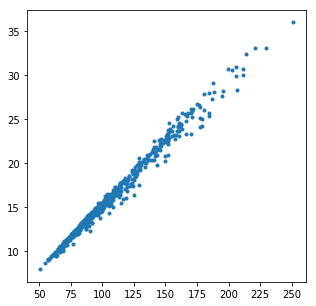

In [51]:
#Biggest correlation of the dataframe
"""
Here we show the biggest correlation out of all the data frame which are worstradius and worstperimeter with a .99 of 
correlation coefficient.
"""
plt.rcParams['figure.figsize'] = (5, 5)
plt.plot(cancer_data_worst["worstperimeter"], cancer_data_worst["worstradius"],'.')
plt.show()

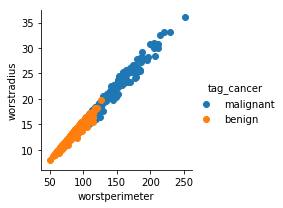

In [52]:
##Biggest correlation of the dataframe with the tag_cancer
"""
As explained above, there is a correlation between higher values in certain correlations and the type of cancer we are
analyzing.
"""
g2 = sns.FacetGrid(cancer_data_worst, hue = 'tag_cancer')
g2 = g2.map(plt.scatter, "worstperimeter", "worstradius")
g2 = g2.add_legend()
plt.show()

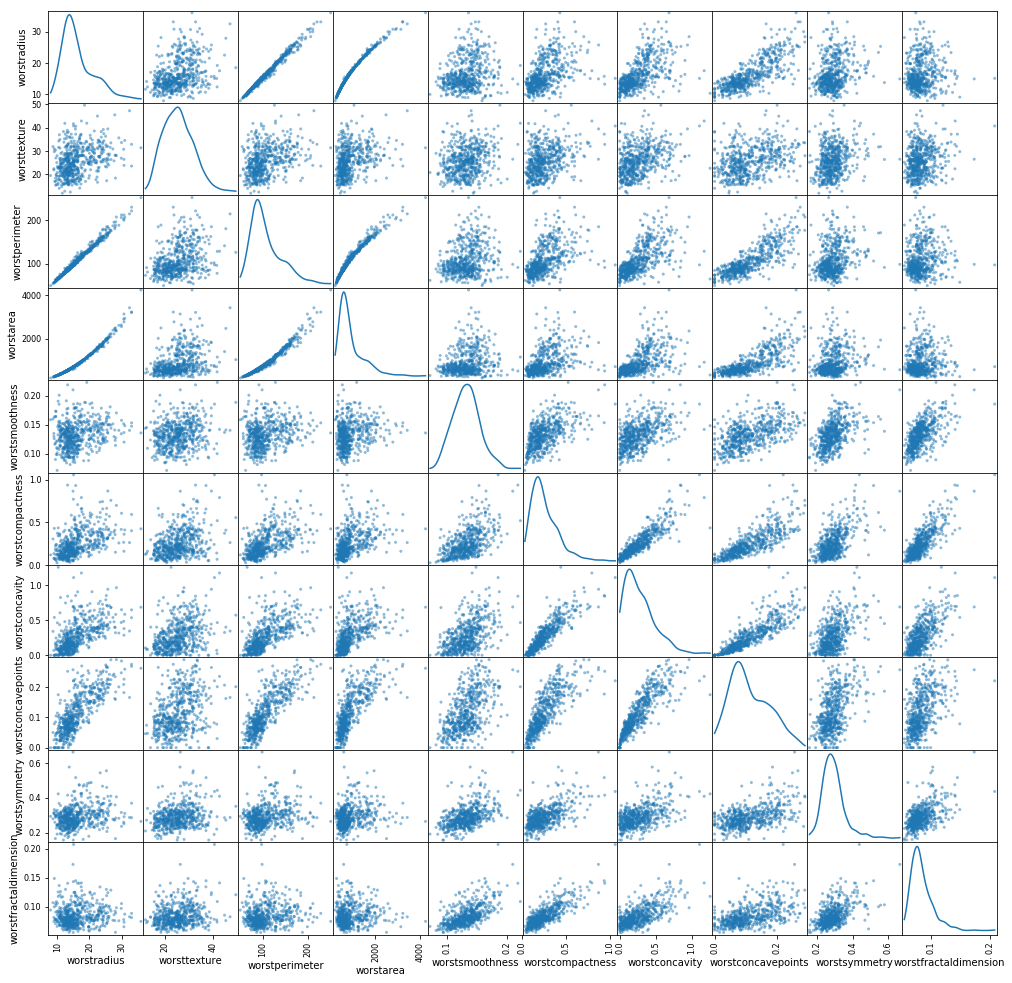

In [53]:
"""
Correlation between all our 'worst variables'.

The same logic from the previous similar graphs apply for this one.
"""
# scatter Plot
from pandas.plotting import scatter_matrix
scatter_matrix(cancer_data_worst, figsize = (17, 17), diagonal='kde')
plt.show()

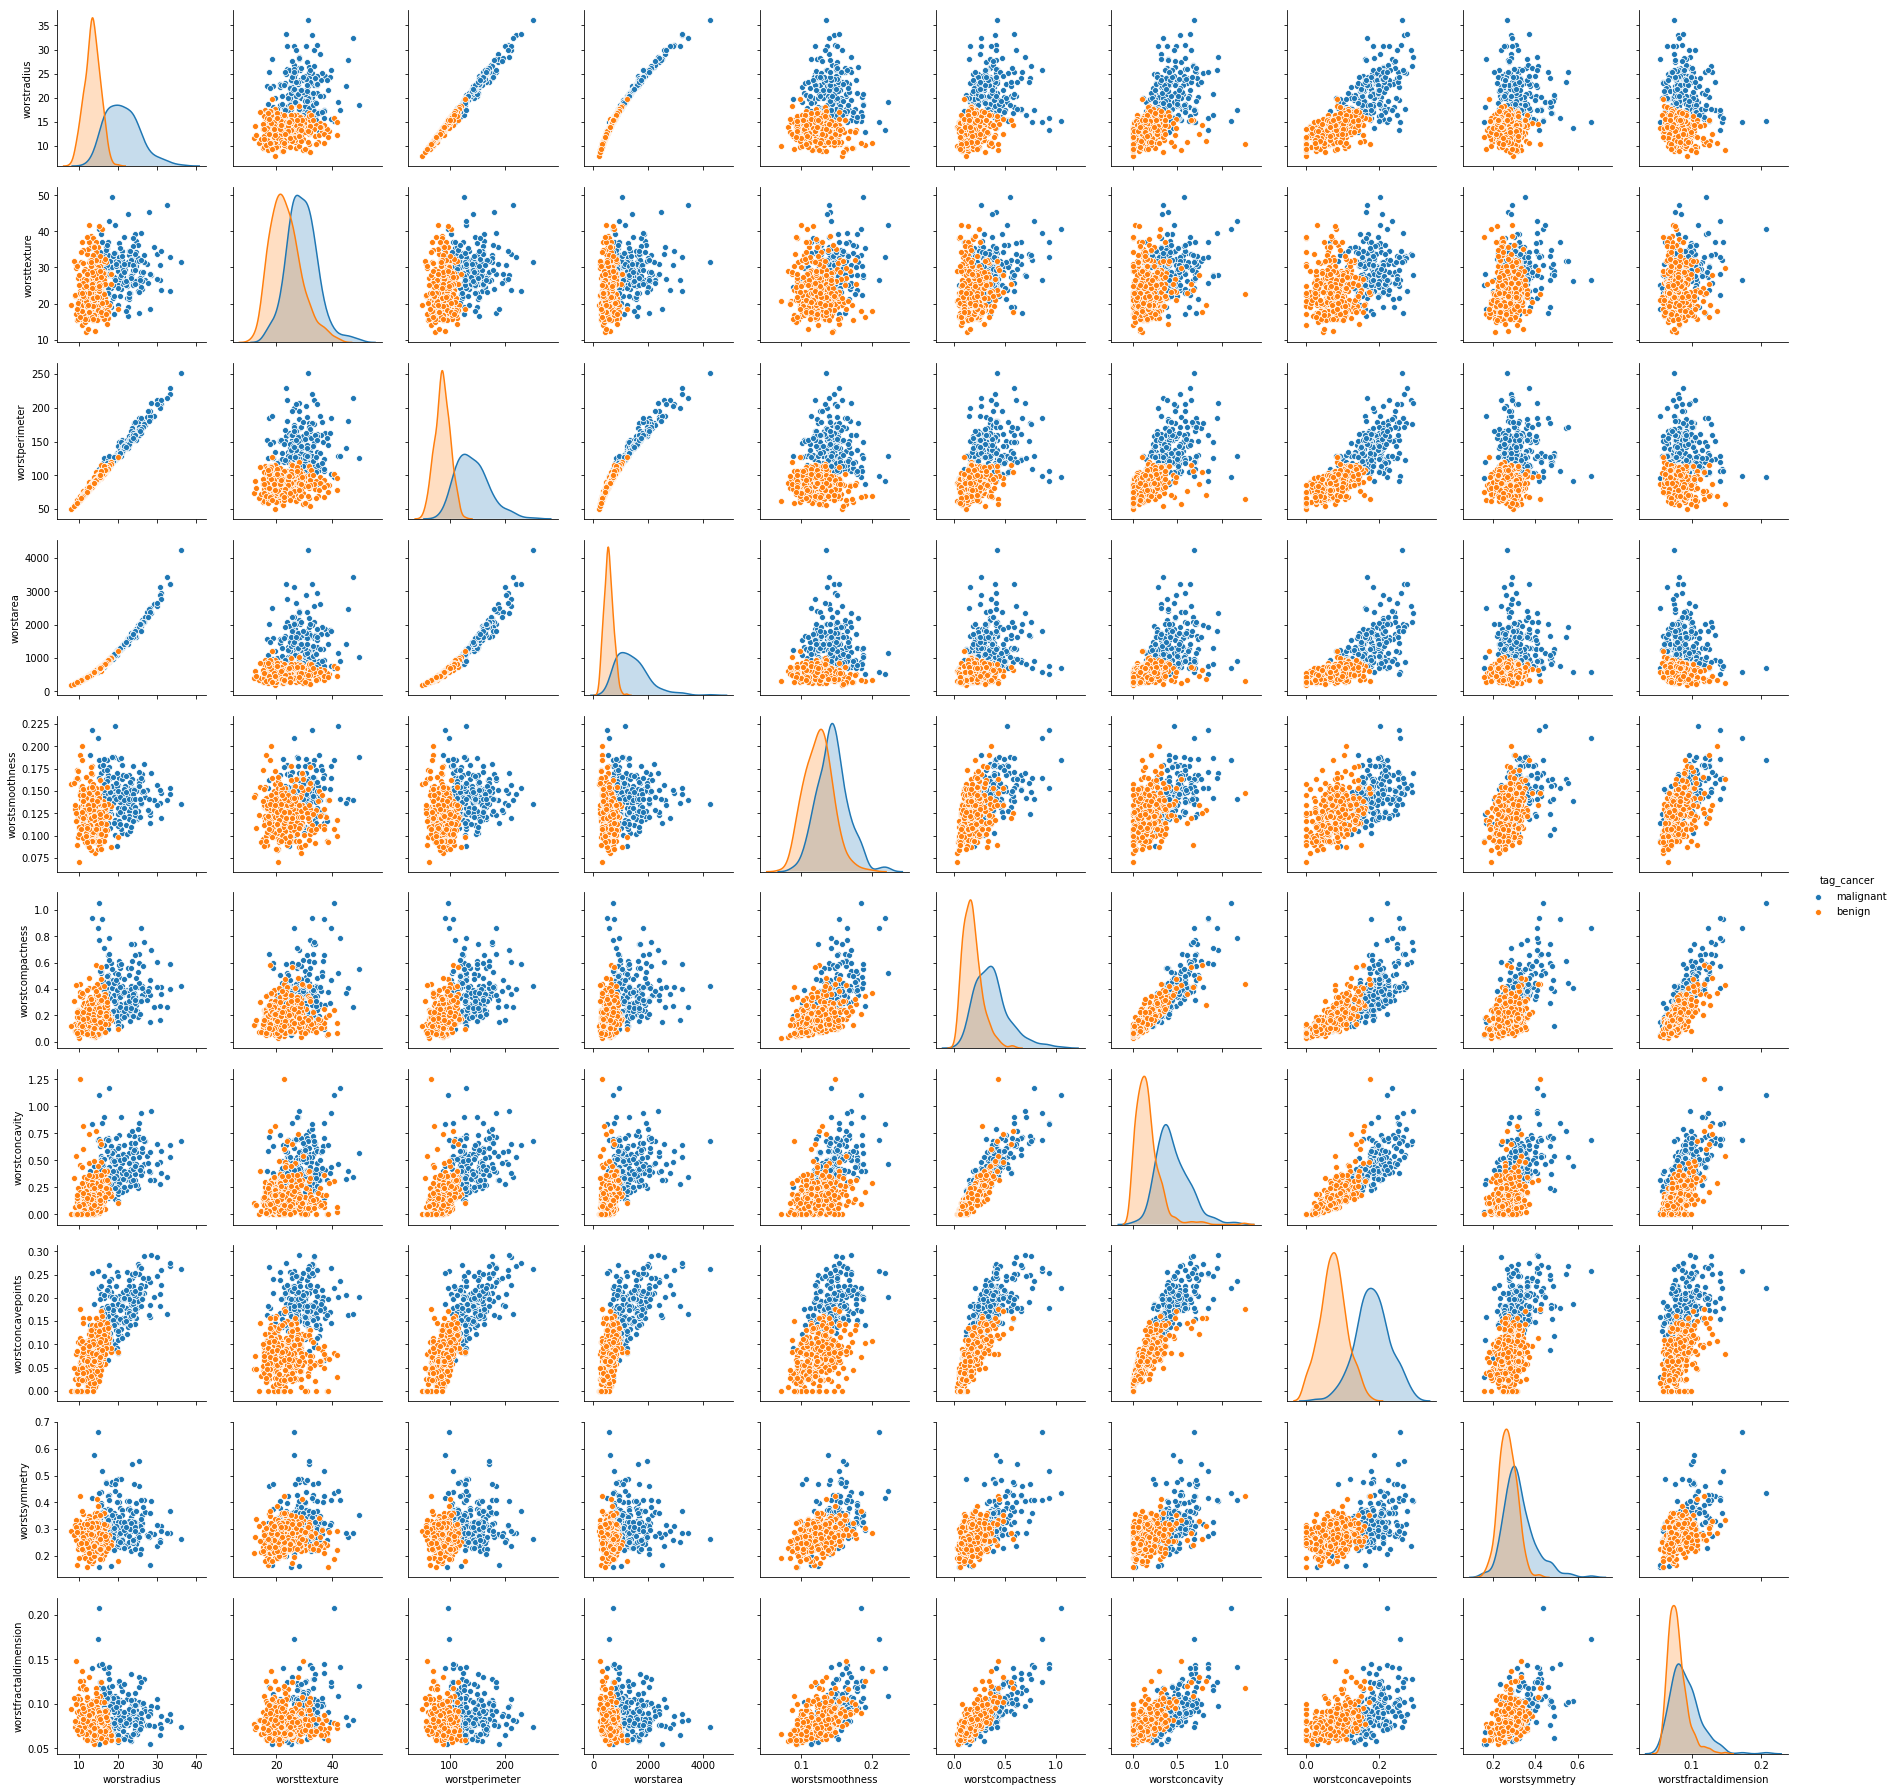

In [54]:
"""
Correlation between all our 'worst variables'.

This graph seems to share similar results the error variables graph and lose the correlation between higher values and 
types of cancer, even though we can see some subplots where said correlation is still true.
"""
g2 = sns.pairplot(cancer_data_worst, hue = "tag_cancer")
plt.show()